In [1]:
import numpy as np
import pandas as pd
from matplotlib import pylab as plt
import pymc3 as pm

ERROR (theano.gpuarray): pygpu was configured but could not be imported or is too old (version 0.7 or higher required)
NoneType: None


In [2]:
from matplotlib import figure

In [3]:
path = 'datos/'
fileName = 'SAOCOM_Chubut_TesisNatyAreasRojas_DatosFiltradosParaRegresion_11x11.csv'

In [4]:
# rho_lenga = 930 # [kg/m3] Nothofagus pumilio
# rho_nire = 1035 # [kg/m3] Nothofagus antarctica

In [5]:

# C11 = mat['C11mn']#, 'C11std', 
# C12 = 1j*mat['C12imn'] + mat['C12rmn'], #'C12istd','C12rstd', 
# C13 = 1j*mat['C13imn'] + mat['C13rmn'], #'C13istd', 'C13rstd', 
# C22 = mat['C22mn'] #'C22std', 
# C23 = 1j*mat['C23imn'] + mat['C23rmn'], # 'C23istd',  'C23rstd', 
# C33 = mat['C33mn'] #, 'C33std'
# C21 = np.conjugate(C12)
# C31 = np.conjugate(C13)
# C32 = np.conjugate(C23)
# C = np.asarray([[C11, C12, C12], [C21, C22, C23], [C31, C32, C33]])

def dB(x):
    return 10*np.log10(x)

def toPower(x):
    return 10**(x/10)

def anotattedScatter(df, col1, col2):
    ax1 = df.plot.scatter(x=col1,y=col2, figsize=(20, 10), grid=True)
    for i, txt in enumerate(df.NAME):
        striped = txt.split('-')[1]
        ax1.annotate(striped, (df[col1][i], df[col2][i]), xytext=(10,-5), textcoords='offset points',
                        family='sans-serif', fontsize=14, color='darkslategrey')  

def anotattedBubbleScatter(df, col1, col2, col3):
    ax1 = df.plot.scatter(x=col1,y=col2, s=col3, figsize=(20, 10), grid=True)
    for i, txt in enumerate(df.NAME):
        striped = txt.split('-')[1]
        ax1.annotate(striped, (df[col1][i], df[col2][i]), xytext=(10,-5), textcoords='offset points',
                        family='sans-serif', fontsize=14, color='darkslategrey') 

def errorBarPlot(df, col1, col2, col2_std):
    # print(col1, col2, col2_std)
    pos, neg = errorBarL(df, col2, col2_std)
    # print(pos, neg)
    ax1 = df.plot.scatter(x=col1,y=col2, yerr=(pos, neg), alpha=0.7, figsize=(20, 12), grid=True)

    # ax1 = df.plot.scatter(x=col1,y=col2, figsize=(20, 10), grid=True)
    for i, txt in enumerate(df.NAME):
        striped = txt.split('-')[1]
        ax1.annotate(striped, (df[col1][i], df[col2][i]), xytext=(10,-5), textcoords='offset points',
                        family='sans-serif', fontsize=14, color='darkslategrey')

# def doubleErrorBarPlot(df, col1, col1_std, col2, col2_std):
#     # print(col1, col2, col2_std)
#     pos, neg = errorBarL(df, col2, col2_std)
#     # print(pos, neg)
#     ax1 = df.plot.scatter(x=col1,y=col2, yerr=(pos, neg), alpha=0.7, figsize=(20, 12), grid=True)

#     # ax1 = df.plot.scatter(x=col1,y=col2, figsize=(20, 10), grid=True)
#     for i, txt in enumerate(df.NAME):
#         striped = txt.split('-')[1]
#         ax1.annotate(striped, (df[col1][i], df[col2][i]), xytext=(10,-5), textcoords='offset points',
#                         family='sans-serif', fontsize=14, color='darkslategrey')


def errorBarL(df, colListMean, colListStd):
    ''' 
    largo barras de error
    '''
    pos = np.abs(dB(1 + (df[colListStd]/toPower(df[colListMean]))))
    neg = np.abs(dB(1 - (df[colListStd]/toPower(df[colListMean]))))

    return pos, neg

In [6]:
data = pd.read_csv(path+fileName, encoding='latin', delimiter = '\t') #'\t'

In [7]:
data

,Tipo,Biomasa_nire_m3/ha,Biomasa_total_m3/ha,Bio_nire_std,Bio_total_std,C11,C12r,C12i,C13r,C13i,...,VV,VV_gamma,VH,VH_gamma,LIA,NrPix.1,VV_std,VV_gamma_std,VH_std,VH_gamma_std
0,nirantal alto-0,157.42,163.12,116.9296,116.7817,0.130695,0.000516,0.002815,0.035513,-0.002871,...,0.120334,0.155868,0.027785,0.035990,33.562057,734,0.016588,0.021489,0.003625,0.004695
1,nirantal alto-00,194.00,221.00,0.0000,0.0000,0.123070,0.008860,0.004322,0.036165,-0.003277,...,0.117058,0.151616,0.027362,0.035440,34.592598,283,0.013138,0.017016,0.002682,0.003474
2,nirantal interm-1,91.50,103.75,23.1589,30.7612,0.130573,0.000122,0.005428,0.041364,-0.002542,...,0.111398,0.144247,0.029345,0.037999,32.302444,271,0.012244,0.015853,0.003397,0.004398
3,nirantal interme-2,86.00,89.50,0.0000,0.7071,0.139690,-0.001585,-0.003490,0.047785,-0.005415,...,0.122338,0.158439,0.026939,0.034889,32.257732,422,0.011882,0.015388,0.004028,0.005216
4,nirantal bajo-3,27.00,27.00,9.5394,9.5394,0.113374,0.003858,0.005382,0.040180,-0.006979,...,0.116209,0.150647,0.030995,0.040179,36.247559,175,0.020592,0.026697,0.005638,0.007310
5,nirantal bajo-4,27.00,27.00,9.5394,9.5394,0.107174,0.005100,0.004690,0.041401,-0.000289,...,0.109107,0.141437,0.025829,0.033482,37.037148,128,0.020759,0.026914,0.003002,0.003892
6,nirantal bajo-5,38.00,38.00,17.4356,17.4356,0.107196,0.002483,0.000839,0.035980,0.002185,...,0.106699,0.138335,0.027377,0.035494,35.733772,828,0.018756,0.024316,0.005159,0.006688
7,nirantal alto-6,90.50,90.50,43.1335,43.1335,0.122037,-0.000850,0.000195,0.034668,0.014495,...,0.116310,0.150584,0.025865,0.033487,33.898911,69,0.012109,0.015679,0.002833,0.003668
8,nirantal alto-7,203.50,404.00,3.5355,275.7716,0.107569,0.004430,-0.005020,0.052729,-0.017040,...,0.086561,0.112246,0.023374,0.030309,44.238914,37,0.005978,0.007753,0.001746,0.002264
9,nirantal alto-8,228.00,254.00,66.4680,77.7817,0.115721,-0.002984,-0.004503,0.036854,0.008360,...,0.095913,0.124371,0.028184,0.036546,40.320259,128,0.014158,0.018361,0.008584,0.011132


In [8]:
data.columns

Index(['Tipo', 'Biomasa_nire_m3/ha', 'Biomasa_total_m3/ha', 'Bio_nire_std',
       'Bio_total_std', 'C11', 'C12r', 'C12i', 'C13r', 'C13i', 'C22', 'C23r',
       'C23i', 'C33', 'ang', 'ENL_C3', 'NrPix', 'C11_std', 'C12r_std',
       'C12i_std', 'C13r_std', 'C13i_std', 'C22_std', 'C23r_std', 'C23i_std',
       'C33_std', 'ang_std', 'NDVI', 'NDVI_std', 'VV', 'VV_gamma', 'VH',
       'VH_gamma', 'LIA', 'NrPix.1', 'VV_std', 'VV_gamma_std', 'VH_std',
       'VH_gamma_std'],
      dtype='object')

In [9]:
# elimino datos 

# sacar los que data['Bio_total_std'] <50 & data['NrPix']>20
# data.loc[((data['Bio_total_std'] <50) & (data['NrPix.1']>20))]

# data = data.drop(16) # saco un dato choto de suelo y
data = data.drop([0,8,9,12,16]) # los que no cumplen data['Bio_total_std'] <50 & data['NrPix']>20 (Mati)

data = data.reset_index(drop=True) # reseteo index

In [10]:
data

,Tipo,Biomasa_nire_m3/ha,Biomasa_total_m3/ha,Bio_nire_std,Bio_total_std,C11,C12r,C12i,C13r,C13i,...,VV,VV_gamma,VH,VH_gamma,LIA,NrPix.1,VV_std,VV_gamma_std,VH_std,VH_gamma_std
0,nirantal alto-00,194.0,221.00,0.0000,0.0000,0.123070,0.008860,0.004322,0.036165,-0.003277,...,0.117058,0.151616,0.027362,0.035440,34.592598,283,0.013138,0.017016,0.002682,0.003474
1,nirantal interm-1,91.5,103.75,23.1589,30.7612,0.130573,0.000122,0.005428,0.041364,-0.002542,...,0.111398,0.144247,0.029345,0.037999,32.302444,271,0.012244,0.015853,0.003397,0.004398
2,nirantal interme-2,86.0,89.50,0.0000,0.7071,0.139690,-0.001585,-0.003490,0.047785,-0.005415,...,0.122338,0.158439,0.026939,0.034889,32.257732,422,0.011882,0.015388,0.004028,0.005216
3,nirantal bajo-3,27.0,27.00,9.5394,9.5394,0.113374,0.003858,0.005382,0.040180,-0.006979,...,0.116209,0.150647,0.030995,0.040179,36.247559,175,0.020592,0.026697,0.005638,0.007310
4,nirantal bajo-4,27.0,27.00,9.5394,9.5394,0.107174,0.005100,0.004690,0.041401,-0.000289,...,0.109107,0.141437,0.025829,0.033482,37.037148,128,0.020759,0.026914,0.003002,0.003892
5,nirantal bajo-5,38.0,38.00,17.4356,17.4356,0.107196,0.002483,0.000839,0.035980,0.002185,...,0.106699,0.138335,0.027377,0.035494,35.733772,828,0.018756,0.024316,0.005159,0.006688
6,nirantal alto-6,90.5,90.50,43.1335,43.1335,0.122037,-0.000850,0.000195,0.034668,0.014495,...,0.116310,0.150584,0.025865,0.033487,33.898911,69,0.012109,0.015679,0.002833,0.003668
7,nirantal alto-9,212.0,212.00,18.3848,18.3848,0.130178,0.007304,0.011288,0.052762,-0.002293,...,0.151784,0.196880,0.036483,0.047323,33.434113,118,0.077326,0.100305,0.014310,0.018563
8,nirantal alto-10,117.0,117.00,33.9411,33.9411,0.106993,-0.001054,0.000633,0.032962,-0.000252,...,0.102298,0.132414,0.024281,0.031429,36.557503,42,0.003890,0.005035,0.001792,0.002320
9,bajo-12,10.5,10.50,8.0208,8.0208,0.070068,-0.001101,-0.001684,0.025857,0.004981,...,0.072490,0.093986,0.017466,0.022645,50.205662,102,0.011150,0.014454,0.003353,0.004346


In [11]:
# rename column
data = data.rename(columns={"Tipo": "NAME"}).copy(deep=True)
data = data.rename(columns={'Biomasa_total_m3/ha': 'AGB'}).copy(deep=True)

In [12]:
data.columns

Index(['NAME', 'Biomasa_nire_m3/ha', 'AGB', 'Bio_nire_std', 'Bio_total_std',
       'C11', 'C12r', 'C12i', 'C13r', 'C13i', 'C22', 'C23r', 'C23i', 'C33',
       'ang', 'ENL_C3', 'NrPix', 'C11_std', 'C12r_std', 'C12i_std', 'C13r_std',
       'C13i_std', 'C22_std', 'C23r_std', 'C23i_std', 'C33_std', 'ang_std',
       'NDVI', 'NDVI_std', 'VV', 'VV_gamma', 'VH', 'VH_gamma', 'LIA',
       'NrPix.1', 'VV_std', 'VV_gamma_std', 'VH_std', 'VH_gamma_std'],
      dtype='object')

In [13]:
# extraigo dataFrame SAOCOM

dataSAOCOM = data[['NAME', 'Biomasa_nire_m3/ha', 'Bio_nire_std',
       'Bio_total_std', 'AGB', 'C11', 'C12r', 'C12i', 'C13r',
       'C13i', 'C22', 'C23r', 'C23i', 'C33', 'ang', 'C11_std', 'C12r_std',
       'C12i_std', 'C13r_std', 'C13i_std', 'C22_std', 'C23r_std', 'C23i_std',
       'C33_std', 'ang_std', 'ENL_C3', 'NDVI', 'NDVI_std']].copy(deep=True)

In [14]:
dataSAOCOM.columns

Index(['NAME', 'Biomasa_nire_m3/ha', 'Bio_nire_std', 'Bio_total_std', 'AGB',
       'C11', 'C12r', 'C12i', 'C13r', 'C13i', 'C22', 'C23r', 'C23i', 'C33',
       'ang', 'C11_std', 'C12r_std', 'C12i_std', 'C13r_std', 'C13i_std',
       'C22_std', 'C23r_std', 'C23i_std', 'C33_std', 'ang_std', 'ENL_C3',
       'NDVI', 'NDVI_std'],
      dtype='object')

In [15]:
# extraigo dataFrame Sentinel

dataSentinelDes = data[['NAME', 'Biomasa_nire_m3/ha', 'Bio_nire_std',
       'Bio_total_std', 'AGB', 'VV', 'VV_gamma', 'VH', 'VH_gamma', 'LIA', 'NrPix.1', 'VV_std',
       'VV_gamma_std', 'VH_std', 'VH_gamma_std', 'NDVI', 'NDVI_std']].copy(deep=True)

In [16]:
dataSentinelDes.columns

Index(['NAME', 'Biomasa_nire_m3/ha', 'Bio_nire_std', 'Bio_total_std', 'AGB',
       'VV', 'VV_gamma', 'VH', 'VH_gamma', 'LIA', 'NrPix.1', 'VV_std',
       'VV_gamma_std', 'VH_std', 'VH_gamma_std', 'NDVI', 'NDVI_std'],
      dtype='object')

In [17]:
# extraigo dataFrame Sentinel

# dataSentinelDes = data[['NAME', 'FECHA', 'LAYER', 'TIPO_FORES', 'SUP_m2', 'Alt Dom', 'AB',
#        'Vol m3/ha total', 'AGB', 'VV.1','VV (gamma0)', 'VV (beta0)', 'VH.1', 'VH (gamma0)', 'VH (beta0)',
#        'VV_std.1', 'VH_std.1', 'LIA.1', 'PLIA.1', 'IAE.1']].copy(deep=True)

In [18]:
del data

In [19]:
# normalizacion angulo Sentinel
# 'corrijo' por angulo de incidencia

toAnalize = ['VV', 'VV_gamma', 'VH', 'VH_gamma']
angSentinel = 'LIA'

def angleNormalization(df, colList, ang, sufix):
    for col in colList:
        df[col+sufix] = df[col]*np.cos(40*np.pi/180)/np.cos(df[ang]*np.pi/180)

angleNormalization(dataSentinelDes, toAnalize, angSentinel, '_corr')

In [20]:
# normalizacion angulo SAOCOM
# 'corrijo' por angulo de incidencia

toAnalize =  ['C11', 'C12r', 'C12i', 'C13r', 'C13i', 'C22', 'C23r', 'C23i', 'C33']

angSAOCOM = 'ang'


def angleNormalization(df, colList, ang, sufix):
    for col in colList:
        df[col+sufix] = df[col]*np.cos(40*np.pi/180)/np.cos(df[ang]*np.pi/180)

angleNormalization(dataSAOCOM, toAnalize, angSAOCOM, '_corr')

In [21]:
dataSentinelDes.columns

Index(['NAME', 'Biomasa_nire_m3/ha', 'Bio_nire_std', 'Bio_total_std', 'AGB',
       'VV', 'VV_gamma', 'VH', 'VH_gamma', 'LIA', 'NrPix.1', 'VV_std',
       'VV_gamma_std', 'VH_std', 'VH_gamma_std', 'NDVI', 'NDVI_std', 'VV_corr',
       'VV_gamma_corr', 'VH_corr', 'VH_gamma_corr'],
      dtype='object')

In [22]:
dataSAOCOM.columns

Index(['NAME', 'Biomasa_nire_m3/ha', 'Bio_nire_std', 'Bio_total_std', 'AGB',
       'C11', 'C12r', 'C12i', 'C13r', 'C13i', 'C22', 'C23r', 'C23i', 'C33',
       'ang', 'C11_std', 'C12r_std', 'C12i_std', 'C13r_std', 'C13i_std',
       'C22_std', 'C23r_std', 'C23i_std', 'C33_std', 'ang_std', 'ENL_C3',
       'NDVI', 'NDVI_std', 'C11_corr', 'C12r_corr', 'C12i_corr', 'C13r_corr',
       'C13i_corr', 'C22_corr', 'C23r_corr', 'C23i_corr', 'C33_corr'],
      dtype='object')

In [23]:
# largo barras de error

# toErrorBarMean = ['VV.1_corr', 'VV (gamma0)_corr', 'VV (beta0)_corr', 'VH.1_corr', 'VH (gamma0)_corr','VH (beta0)_corr']
# toErrorBarStd = ['VV.1_corr', 'VV (gamma0)_corr', 'VV (beta0)_corr', 'VH.1_corr', 'VH (gamma0)_corr','VH (beta0)_corr']


# def errorBarL(df, colListMean, colListStd):
#     for mean, std in zip(colListMean, colListStd):
        
#         pos = np.abs(dB(1 + (df[std]/df[mean])))
#         neg = np.abs(dB(1 - (df[std]/df[mean])))

#         # pos = np.abs(dB(df[mean]) - dB(df[mean] + df[std]))
#         # neg = np.abs(dB(df[mean]) - dB(df[mean] - df[std]))
        
#         df[mean+'_pos'] = pos 
#         df[mean+'_neg'] = neg 
        
# errorBarL(dataSentinel_AGB, toProcessSentinelMean, toProcessSentinelStd)

In [24]:
# paso a dB Sentinel
# toDBSentinel = ['VV.1_corr', 'VV (gamma0)_corr', 'VV (beta0)_corr', 'VH.1_corr', 'VH (gamma0)_corr','VH (beta0)_corr']
toDBSentinel = ['VV_corr', 'VV_gamma_corr', 'VH_corr', 'VH_gamma_corr']

def newCol(df, colList, sufix):
    for col in colList:
        df[col+sufix] = dB(df[col])

newCol(dataSentinelDes, toDBSentinel, '_dB')

In [25]:
# paso a dB SAOCOM
# toDBSentinel = ['VV.1_corr', 'VV (gamma0)_corr', 'VV (beta0)_corr', 'VH.1_corr', 'VH (gamma0)_corr','VH (beta0)_corr']
toDBSAOCOM = ['C11_corr', 'C22_corr', 'C33_corr']

def newCol(df, colList, sufix):
    for col in colList:
        df[col+sufix] = dB(df[col])

newCol(dataSAOCOM, toDBSAOCOM, '_dB')

In [26]:
dataSentinelDes.columns

Index(['NAME', 'Biomasa_nire_m3/ha', 'Bio_nire_std', 'Bio_total_std', 'AGB',
       'VV', 'VV_gamma', 'VH', 'VH_gamma', 'LIA', 'NrPix.1', 'VV_std',
       'VV_gamma_std', 'VH_std', 'VH_gamma_std', 'NDVI', 'NDVI_std', 'VV_corr',
       'VV_gamma_corr', 'VH_corr', 'VH_gamma_corr', 'VV_corr_dB',
       'VV_gamma_corr_dB', 'VH_corr_dB', 'VH_gamma_corr_dB'],
      dtype='object')

In [27]:
dataSAOCOM.columns

Index(['NAME', 'Biomasa_nire_m3/ha', 'Bio_nire_std', 'Bio_total_std', 'AGB',
       'C11', 'C12r', 'C12i', 'C13r', 'C13i', 'C22', 'C23r', 'C23i', 'C33',
       'ang', 'C11_std', 'C12r_std', 'C12i_std', 'C13r_std', 'C13i_std',
       'C22_std', 'C23r_std', 'C23i_std', 'C33_std', 'ang_std', 'ENL_C3',
       'NDVI', 'NDVI_std', 'C11_corr', 'C12r_corr', 'C12i_corr', 'C13r_corr',
       'C13i_corr', 'C22_corr', 'C23r_corr', 'C23i_corr', 'C33_corr',
       'C11_corr_dB', 'C22_corr_dB', 'C33_corr_dB'],
      dtype='object')

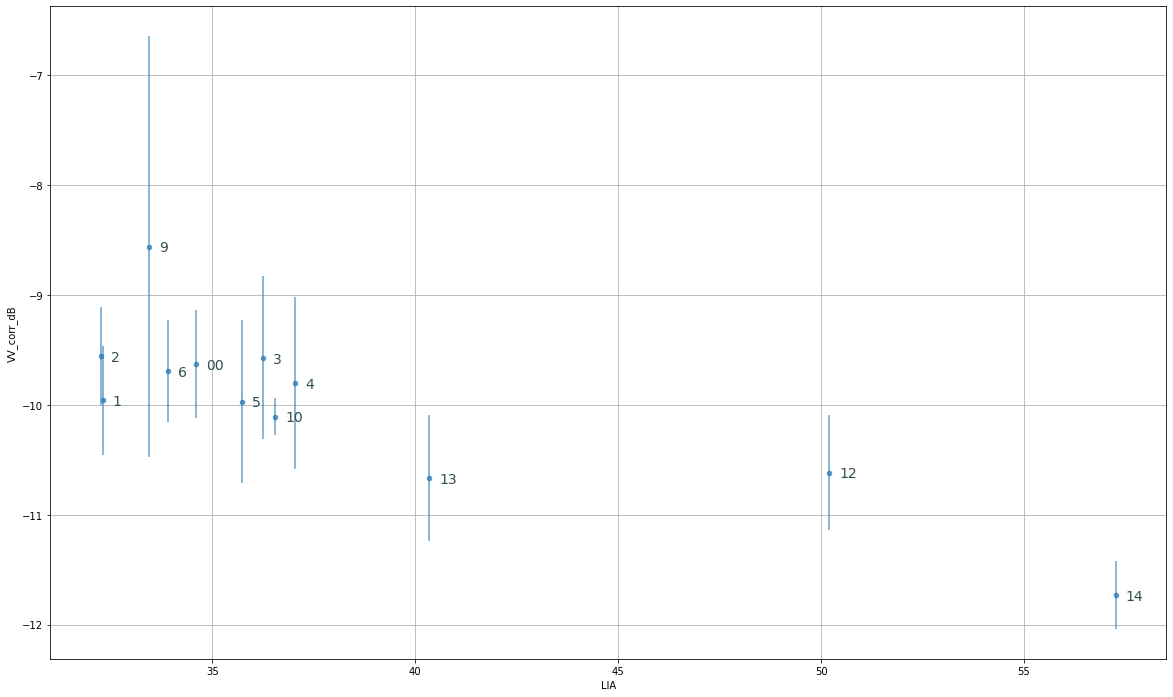

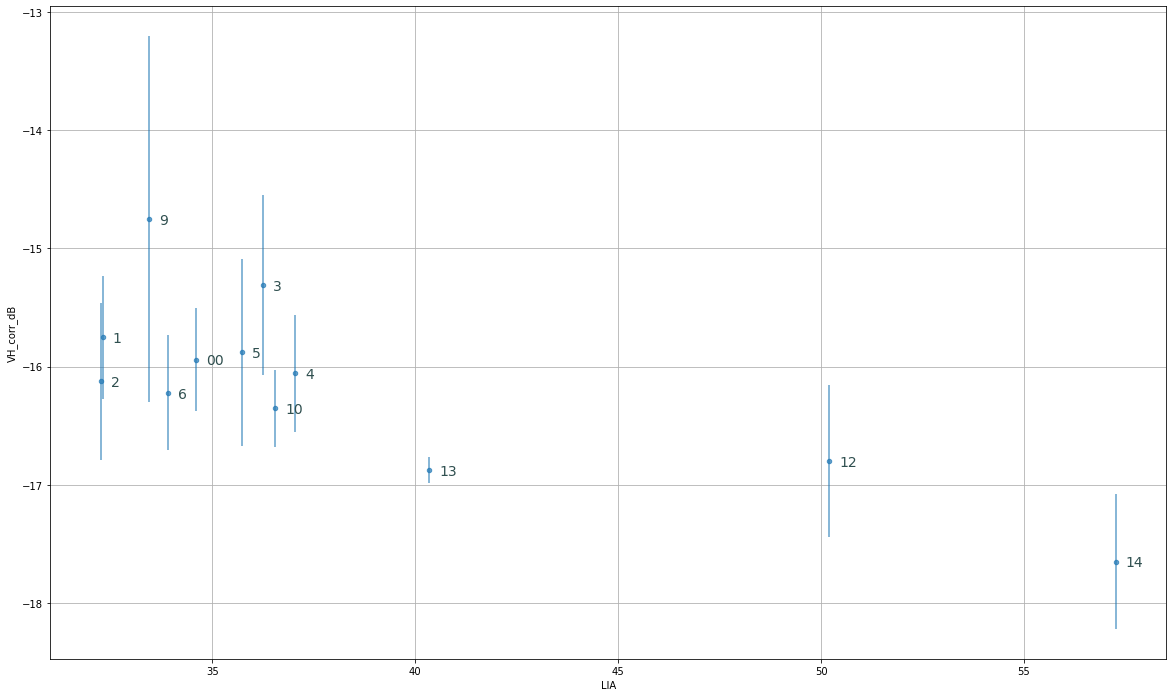

In [28]:
# preliminares Sentinel - estudio angulo de incidencia

toPlot = ['VV_corr_dB', 'VH_corr_dB']
toPlotStd = ['VV_std', 'VH_std']

# toPlot = ['VV.1_corr_dB', 'VH.1_corr_dB']

for mean, std in zip(toPlot, toPlotStd):
    # anotattedScatter(dataSentinelDes, 'LIA.1', figura)
    # print(mean, std)
    errorBarPlot(dataSentinelDes, 'LIA', mean, std)

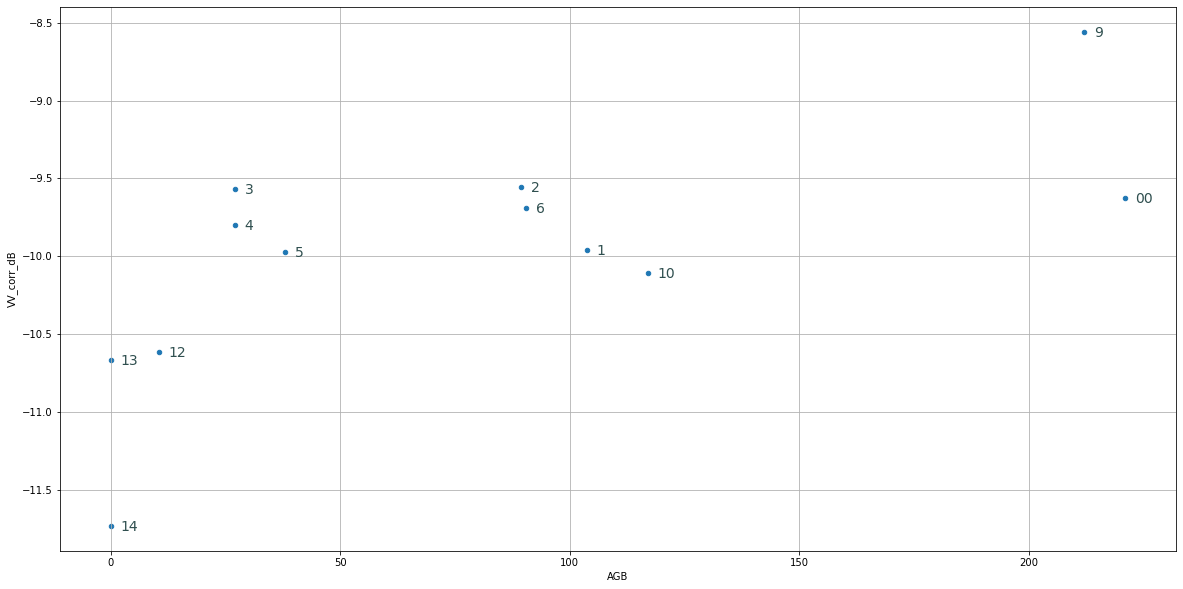

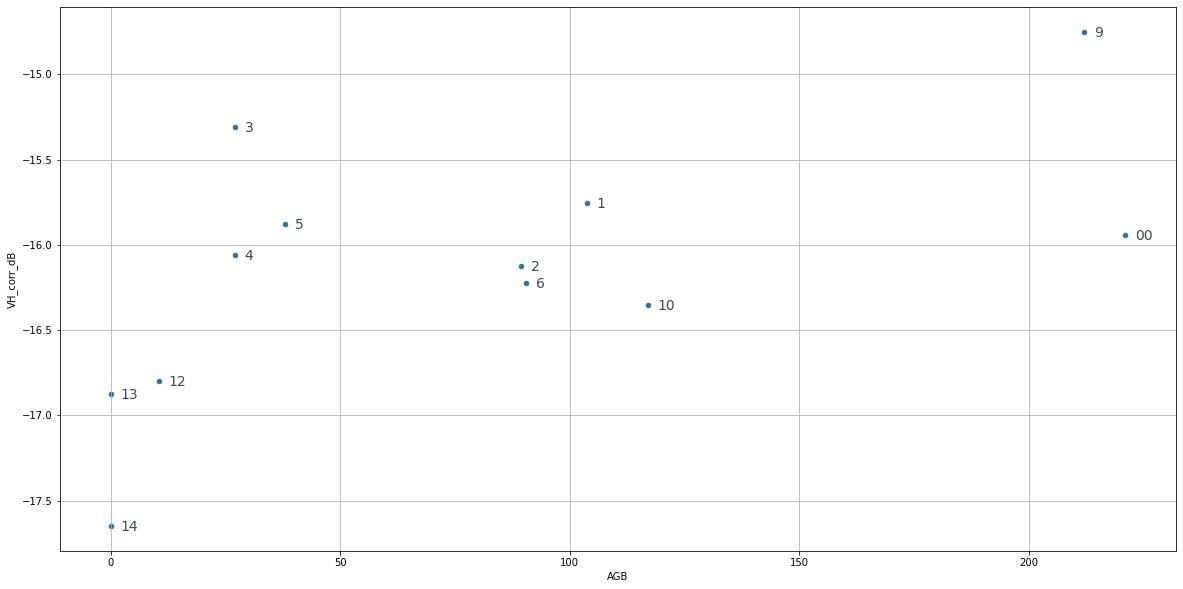

In [29]:
# preliminares Sentinel - estudio Biomasa

toPlot = ['VV_corr_dB', 'VH_corr_dB']

for figura in toPlot:
    anotattedScatter(dataSentinelDes, 'AGB', figura)

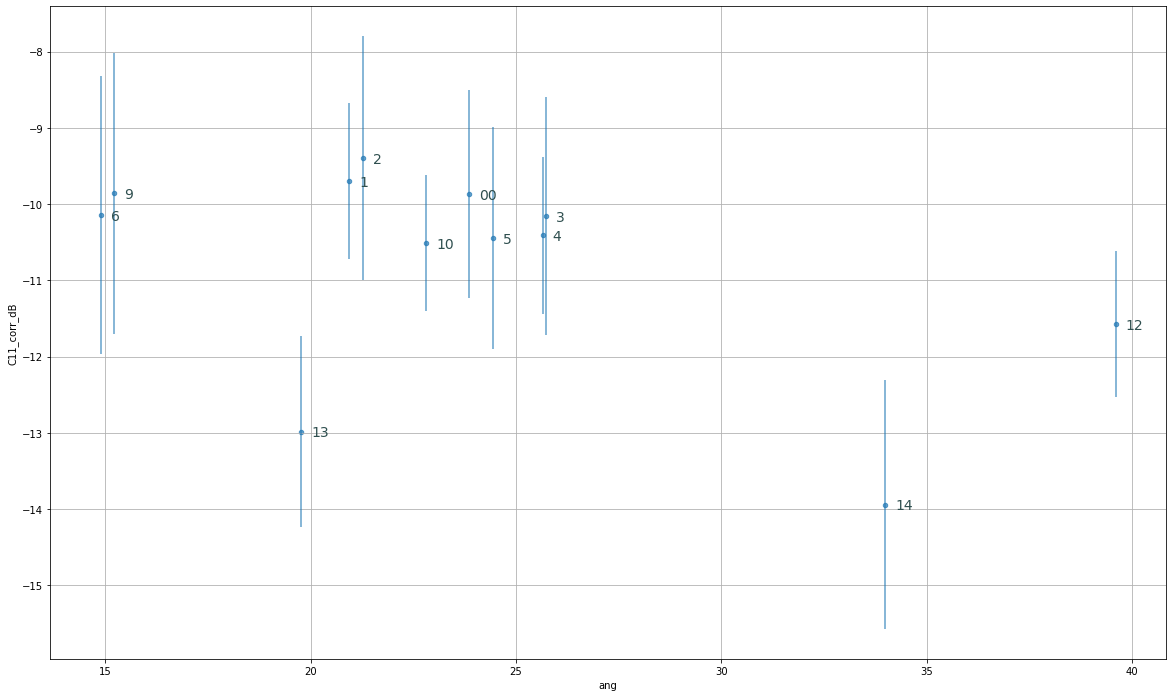

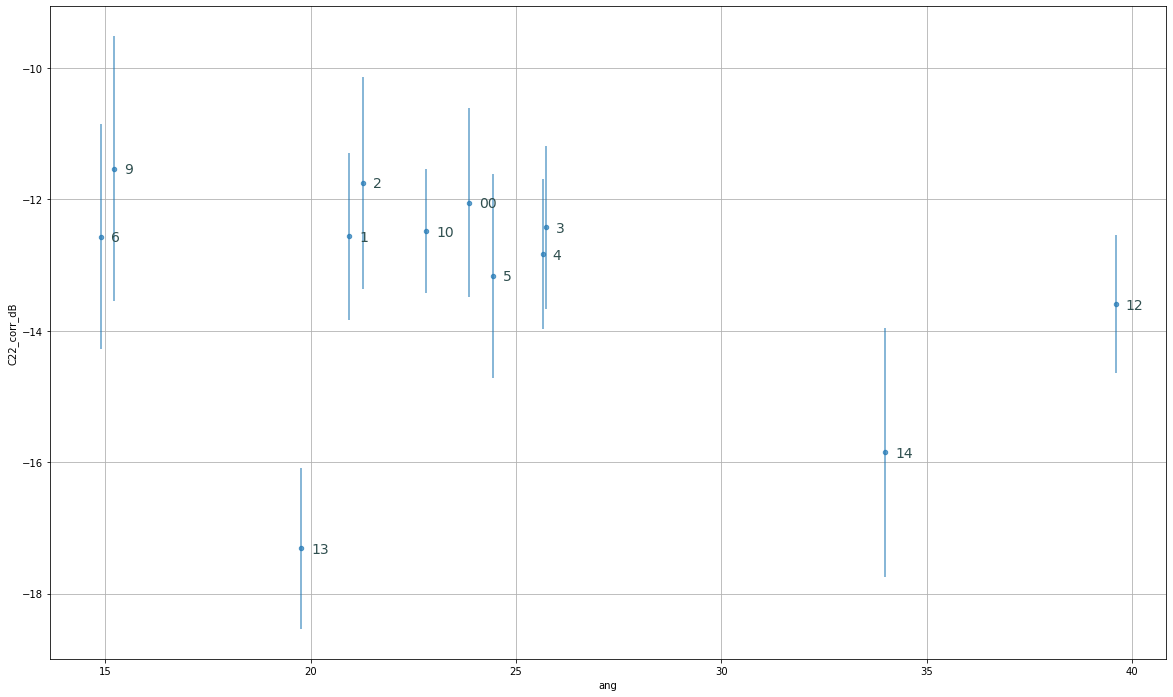

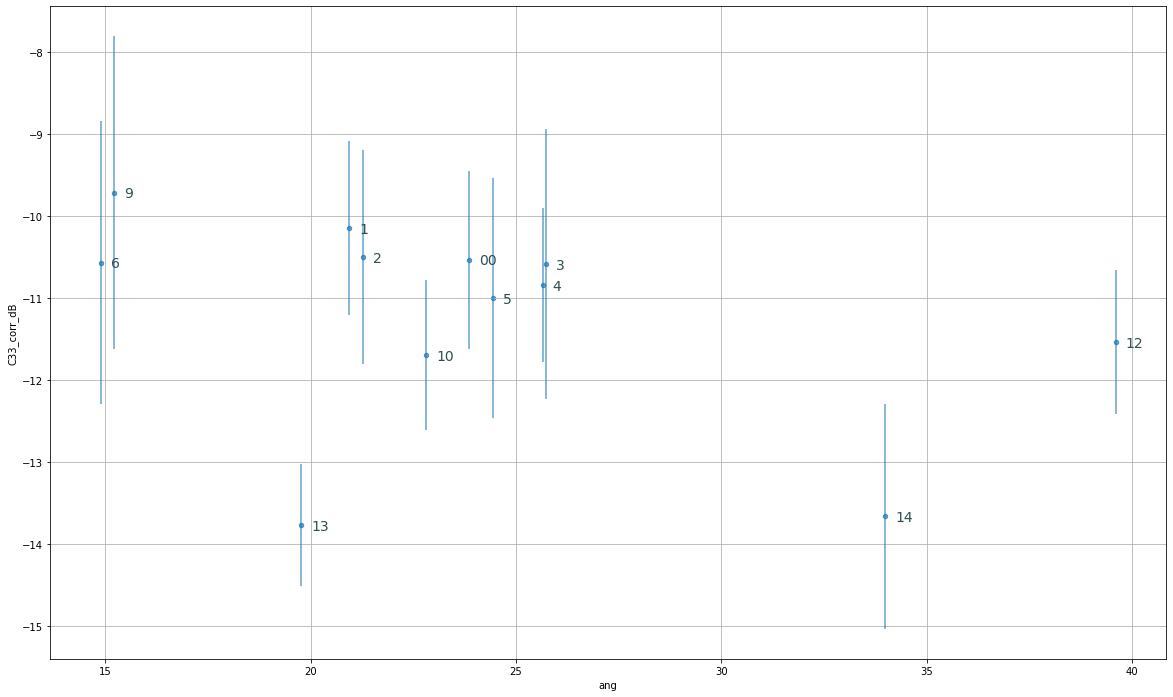

In [30]:
# preliminares SAOCOM - estudio angulo de incidencia

toPlot = ['C11_corr_dB', 'C22_corr_dB', 'C33_corr_dB']
toPlotStd = ['C11_std','C22_std', 'C33_std']

for mean, std in zip(toPlot, toPlotStd):
    # anotattedScatter(dataSentinelDes, 'LIA.1', figura)
    # print(mean, std)
    errorBarPlot(dataSAOCOM, 'ang', mean, std)

In [31]:
# # datos correcion angulo

# plt.figure(figsize=(14, 8), dpi=300)

# y_original = dataSAOCOM.sort_values('C22_corr_dB')['C22_corr_dB']
# x_original = dataSAOCOM.sort_values('C22_corr_dB')['ang']
# y_err = dataSAOCOM.sort_values('C22_corr_dB')['C22_sigma_dB']
# x_err = dataSAOCOM.sort_values('C22_corr_dB')['ang_std']

# # plt.errorbar(x_raw, y_raw, label="data")
# plt.errorbar(x_original, y_original, marker='o', mfc='k', mec='k', ms=10, mew=1, 
#              yerr=y_err, xerr=x_err, linestyle="None", label="data")


# # y_original = dataSAOCOM.sort_values('C22_corr_dB')['C22_corr_dB']
# # x_original = dataSAOCOM.sort_values('C22_corr_dB')['ang']
# # y_err = dataSAOCOM.sort_values('C22_corr_dB')['C22_sigma_dB']
# # x_err = dataSAOCOM.sort_values('C22_corr_dB')['ang_std']

# # plt.errorbar(x_raw, y_raw, label="data")
# plt.errorbar(x_original, y_original, marker='o', mfc='k', mec='k', ms=10, mew=1, 
#              yerr=y_err, xerr=x_err, linestyle="None", label="data")


# plt.title("Datos a ajustar")
# plt.legend(loc=0)
# plt.ylabel("C22 [dB]")
# plt.grid(True)
# plt.xlabel("LIA [deg]")



# # plt.savefig('informe/C22-Tofit.png')

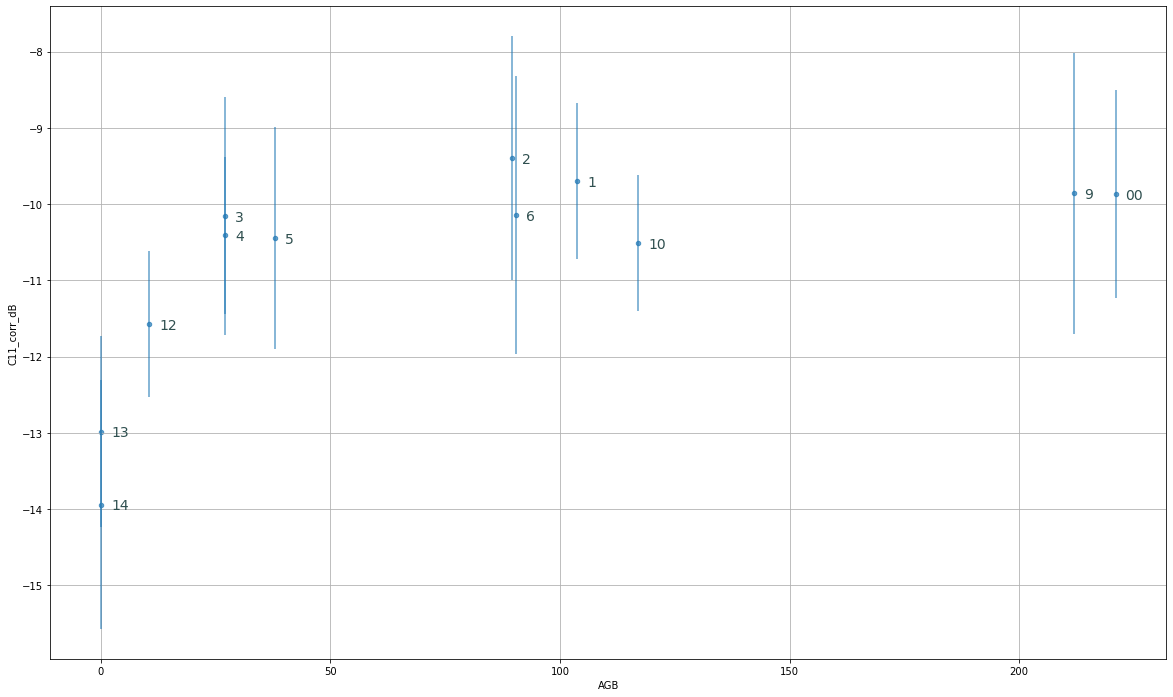

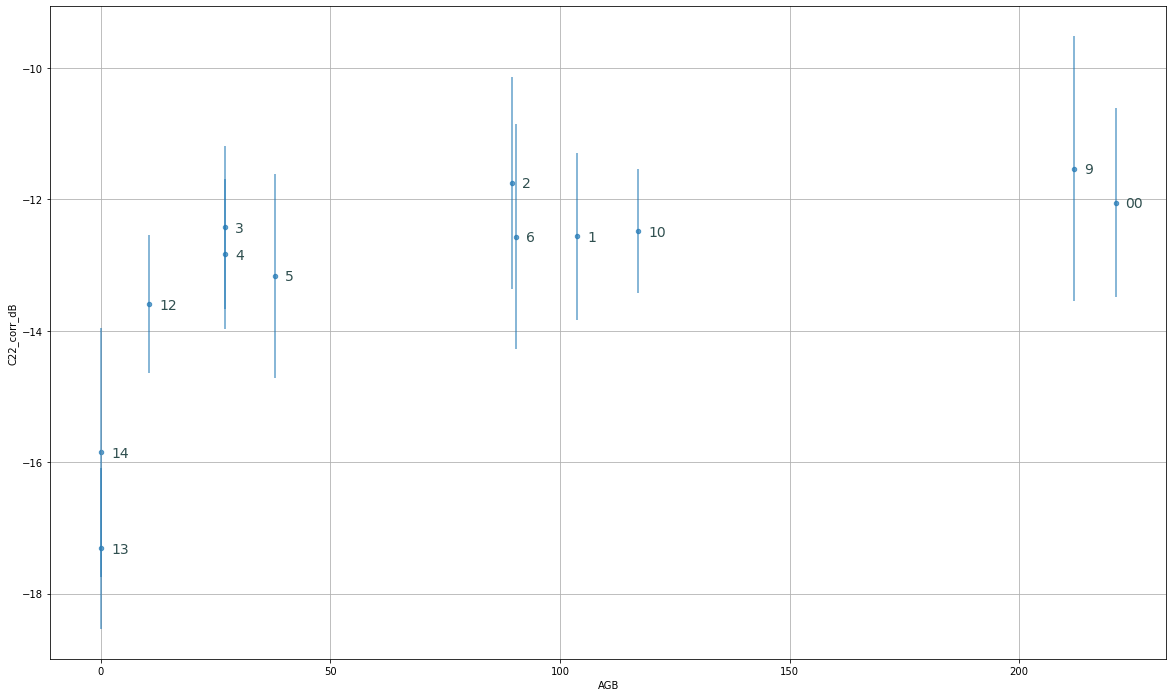

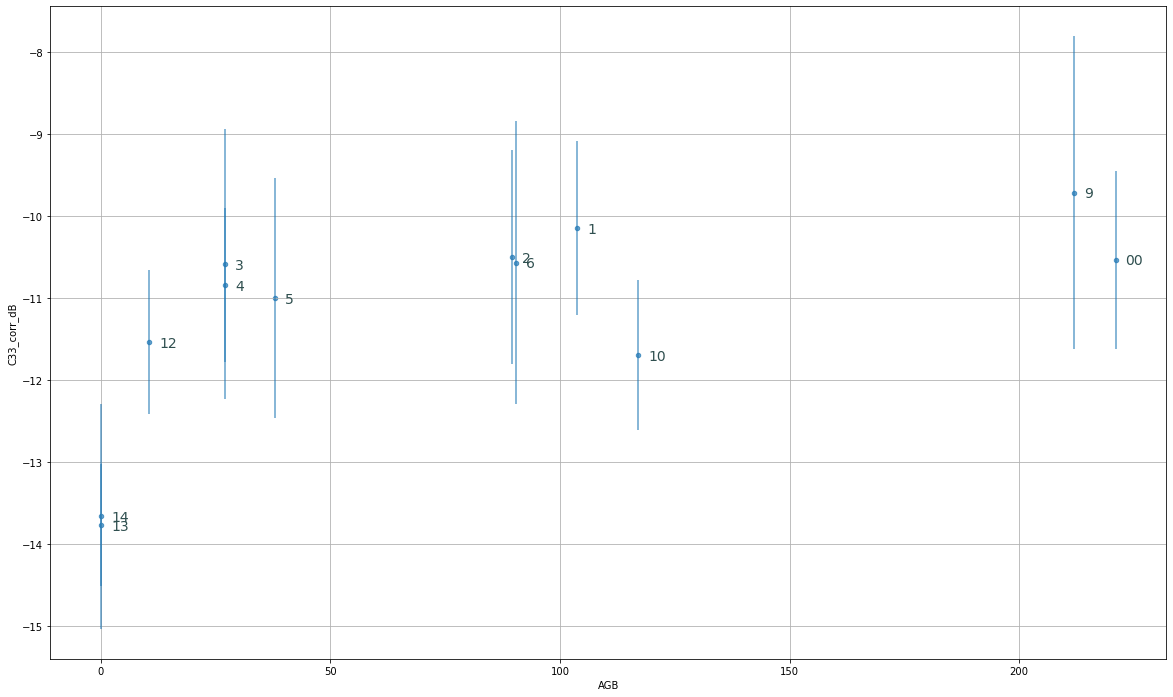

In [32]:
# preliminares SAOCOM - estudio Biomasa

toPlot = ['C11_corr_dB', 'C22_corr_dB', 'C33_corr_dB']
toPlotStd = ['C11_std','C22_std', 'C33_std']

for mean, std in zip(toPlot, toPlotStd):
    # anotattedScatter(dataSentinelDes, 'LIA.1', figura)
    # print(mean, std)
    errorBarPlot(dataSAOCOM, 'AGB', mean, std)

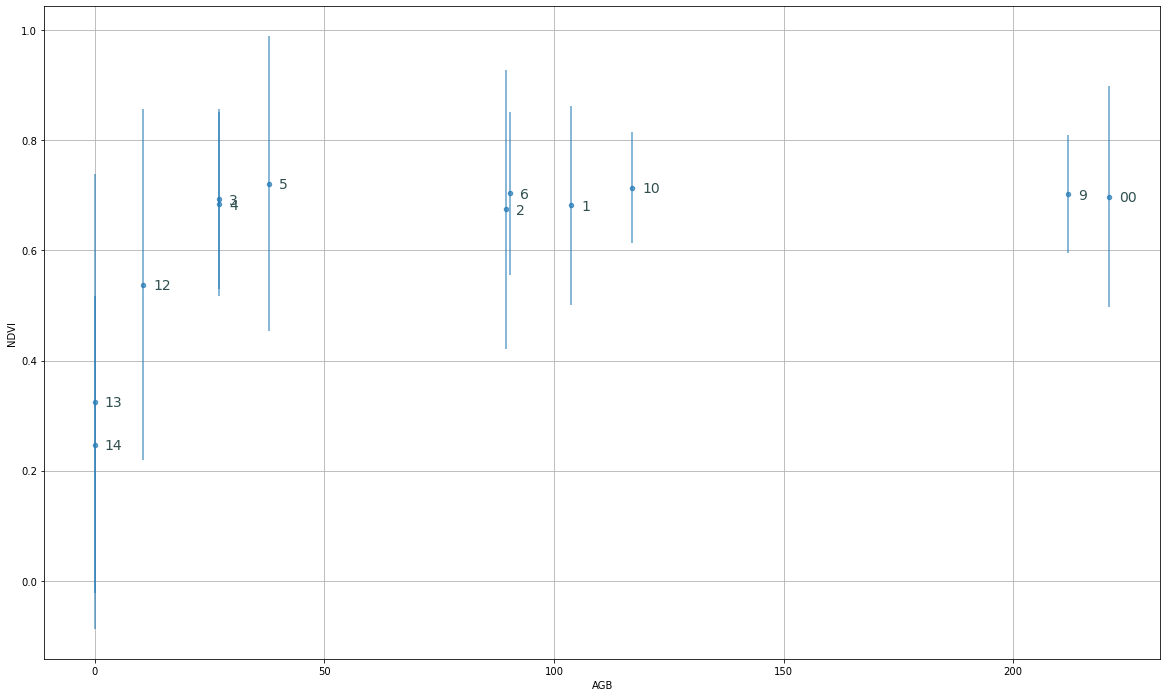

In [33]:
errorBarPlot(dataSAOCOM, 'AGB', 'NDVI', 'NDVI_std')

In [34]:
dataSentinelDes.columns

Index(['NAME', 'Biomasa_nire_m3/ha', 'Bio_nire_std', 'Bio_total_std', 'AGB',
       'VV', 'VV_gamma', 'VH', 'VH_gamma', 'LIA', 'NrPix.1', 'VV_std',
       'VV_gamma_std', 'VH_std', 'VH_gamma_std', 'NDVI', 'NDVI_std', 'VV_corr',
       'VV_gamma_corr', 'VH_corr', 'VH_gamma_corr', 'VV_corr_dB',
       'VV_gamma_corr_dB', 'VH_corr_dB', 'VH_gamma_corr_dB'],
      dtype='object')

In [ ]:
# estudio error

# figure(figsize=(20, 6), dpi=80)

# C11_yerr_pos = np.abs(data_AGB['C11_dB'] - 10*np.log10(data_AGB['C11'] + data_AGB['C11_std']))
# C11_yerr_neg = np.abs(data_AGB['C11_dB'] - 10*np.log10(data_AGB['C11'] - data_AGB['C11_std']))

# # C11_yerr_pos = 1*np.ones(data_AGB.C11.shape)
# # C11_yerr_neg = 5*np.ones(data_AGB.C11.shape)

# plt.errorbar(data_AGB['NAME'], data_AGB['C11_dB'], yerr=(C11_yerr_neg, C11_yerr_pos))
# # plt.xticks(rotation=90)
# # plt.plot(data_AGB['NAME'], data_AGB['C11_dB'])
# # plt.plot(data_AGB['NAME'], C11_yerr_pos)
# plt.xticks(rotation=90)

In [ ]:
# def toProcessGenerator(df):
#     toProcessMean = []
#     toProcessStd = []
#     for col in df.columns:
#         if '_dB' in col:
#             toProcessMean.append(col)
#             stdName = col.split('_')[0]+'_std'
#             toProcessStd.append(stdName)

#     return toProcessMean, toProcessStd

In [ ]:
# toProcessSAOCOMMean, toProcessSAOCOMStd  = toProcessGenerator(data)
# toProcessSentinelMean, toProcessSentinelStd  = toProcessGenerator(dataSentinel)

In [ ]:
# toProcessSAOCOMMean, toProcessSAOCOMStd  = ['C11_corr', 'C22_corr', 'C33_corr'], ['C11_std', 'C22_std', 'C33_std']
# # No hay datos de std para las descending

# toProcessSentinelMean = []
# toProcessSentinelStd = []

In [ ]:
# '''
# toProcessSAOCOMMean, toProcessSAOCOMStd  = toProcessGenerator(data)
# toProcessSentinelMean, toProcessSentinelStd  = toProcessGenerator(dataSentinel)
# '''

# errorBarL(data_AGB, toProcessSAOCOMMean, toProcessSAOCOMStd)

In [ ]:
# data_AGB[['C11_corr_pos', 'C11_corr_neg']]

In [ ]:
# errorBarL(dataSentinel_AGB, toProcessSentinelMean, toProcessSentinelStd)

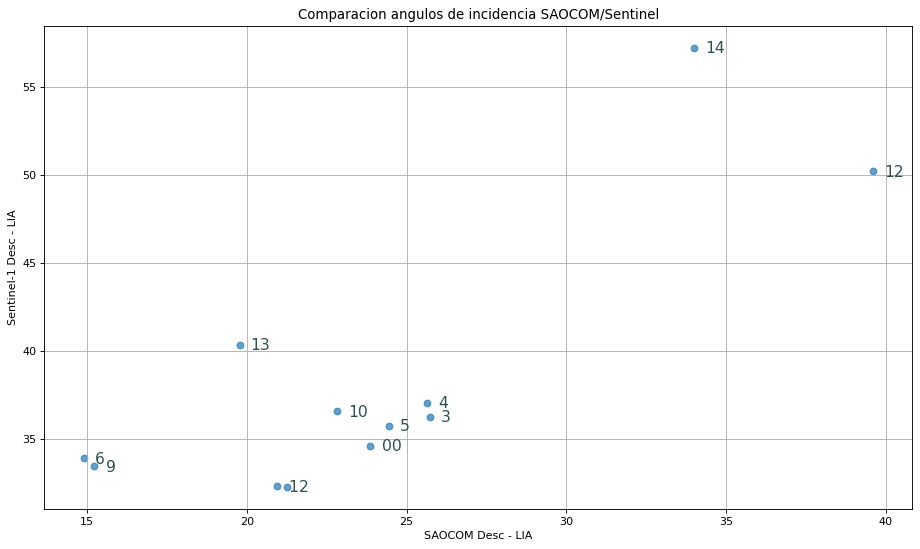

In [35]:
# Estudio angulos SAOCOM vs Sentinel

plt.figure(figsize=(14, 8), dpi=80)
plt.scatter(dataSAOCOM['ang'], dataSentinelDes['LIA'], alpha=0.7) #figsize=(20, 12), grid=True

plt.title("Comparacion angulos de incidencia SAOCOM/Sentinel")
plt.grid(True)
plt.xlabel("SAOCOM Desc - LIA")
plt.ylabel("Sentinel-1 Desc - LIA")

ax = plt.gca()

for i, txt in enumerate(dataSAOCOM['NAME']):  #label=dataSAOCOM['NAME']
   striped = txt.split('-')[1]
   ax.annotate(striped, (dataSAOCOM['ang'][i], dataSentinelDes['LIA'][i]), xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=14, color='darkslategrey')  

# plt.savefig('informe/ang-SAOCOM-Sentinel.png')

In [36]:
# Polarimetria

In [37]:
dataSAOCOM.columns

Index(['NAME', 'Biomasa_nire_m3/ha', 'Bio_nire_std', 'Bio_total_std', 'AGB',
       'C11', 'C12r', 'C12i', 'C13r', 'C13i', 'C22', 'C23r', 'C23i', 'C33',
       'ang', 'C11_std', 'C12r_std', 'C12i_std', 'C13r_std', 'C13i_std',
       'C22_std', 'C23r_std', 'C23i_std', 'C33_std', 'ang_std', 'ENL_C3',
       'NDVI', 'NDVI_std', 'C11_corr', 'C12r_corr', 'C12i_corr', 'C13r_corr',
       'C13i_corr', 'C22_corr', 'C23r_corr', 'C23i_corr', 'C33_corr',
       'C11_corr_dB', 'C22_corr_dB', 'C33_corr_dB'],
      dtype='object')

In [38]:
C11 = dataSAOCOM['C11_corr'].values#, 'C11std', 
C12 = 1j*dataSAOCOM['C12i_corr'].values + dataSAOCOM['C12r_corr'].values #'C12istd','C12rstd', 
C13 = 1j*dataSAOCOM['C13i_corr'].values + dataSAOCOM['C13r_corr'].values #'C13istd', 'C13rstd', 
C22 = dataSAOCOM['C22_corr'].values #'C22std', 
C23 = 1j*dataSAOCOM['C23i_corr'].values + dataSAOCOM['C23r_corr'].values # 'C23istd',  'C23rstd', 
C33 = dataSAOCOM['C33_corr'].values #, 'C33std'
C21 = np.conjugate(C12)
C31 = np.conjugate(C13)
C32 = np.conjugate(C23)
C = np.asarray([[C11, C12, C13], [C21, C22, C23], [C31, C32, C33]])

In [39]:
Q = np.zeros((C.shape[2],3,3), dtype=complex)

for i in range(C.shape[2]):
    Q[i,:,:] = C[:,:,i]
    
# list(C.reshape((54, 3, 3)))

In [40]:
# for i in range(C.shape[2]):
#     print(C[:,:,i] == Q[i,:,:])

# testeo parte imag C12
# Q_ = C.reshape((54, 3, 3), order='C')

# for i in range(3):
#     for j in range(3):
#         print(C[0,1,:] == Q_[:,i,j])

# type(Q_) == type(C)

# C_ = C.reshape((54,3,3))
# T = np.zeros(C_.shape, dtype = complex)
# for parcela in range(T.shape[0]):
#     T[parcela,:,:] = CaT(C_[parcela,:,:])

In [41]:
dataSAOCOM['C'] = list(Q)

In [42]:
dataSAOCOM.columns

Index(['NAME', 'Biomasa_nire_m3/ha', 'Bio_nire_std', 'Bio_total_std', 'AGB',
       'C11', 'C12r', 'C12i', 'C13r', 'C13i', 'C22', 'C23r', 'C23i', 'C33',
       'ang', 'C11_std', 'C12r_std', 'C12i_std', 'C13r_std', 'C13i_std',
       'C22_std', 'C23r_std', 'C23i_std', 'C33_std', 'ang_std', 'ENL_C3',
       'NDVI', 'NDVI_std', 'C11_corr', 'C12r_corr', 'C12i_corr', 'C13r_corr',
       'C13i_corr', 'C22_corr', 'C23r_corr', 'C23i_corr', 'C33_corr',
       'C11_corr_dB', 'C22_corr_dB', 'C33_corr_dB', 'C'],
      dtype='object')

In [43]:
# df = pd.DataFrame({"A":[3,4],"B":[5,6],"C":[7,8]}, index=["a","b"])
# df
# df['otraMas'] = [[1,2], [3,4]]
# df['ultima'] = [[[1,2],[1,2]], [[3,4],[3,4]]]
# cacona = [[[1,2],[1,2]], [[3,4],[3,4]]]
# df['mas'] = cacona


In [44]:
# Ejemplo Matriz C
print(np.around(dataSAOCOM['C'][0],4))

[[0.1031+0.j     0.0074+0.0036j 0.0303-0.0027j]
 [0.0074-0.0036j 0.0624+0.j     0.001 -0.0005j]
 [0.0303+0.0027j 0.001 +0.0005j 0.0885+0.j    ]]


In [45]:
def CaT(C):
    '''
    Pasa de Matriz C a Matriz T.
    Toma como entrada una matriz de C de 3x3
    '''
    # print(C)
    T = np.zeros((3,3), dtype = complex)
    T[0,0] = C[0,0] + C[2,2] + 2*np.real(C[0,2])
    T[0,1] = C[0,0] - C[2,2] - 2j*np.imag(C[0,2])
    T[0,2] = np.sqrt(2)*(C[0,1] + C[2,1])
    T[1,0] = np.conjugate(T[0,1])
    T[1,1] = C[0,0] + C[2,2] - 2*np.real(C[0,2])
    T[1,2] = np.sqrt(2)*(C[0,1] - C[2,1])
    T[2,0] = np.conjugate(T[0,2])
    T[2,1] = np.conjugate(T[1,2])
    T[2,2] = 2*C[1,1]
    return T

In [46]:
dataSAOCOM['T'] = dataSAOCOM['C'].apply(lambda row: CaT(row)) #axis=1

In [47]:
# Prueba matriz CaT
Cprueba = C[:,:,8]
print(np.around(Cprueba, 4))
Tprueba = CaT(Cprueba)
print(np.around(Tprueba, 4))

[[ 0.0889+0.j     -0.0009+0.0005j  0.0274-0.0002j]
 [-0.0009-0.0005j  0.0565+0.j     -0.0001-0.0043j]
 [ 0.0274+0.0002j -0.0001+0.0043j  0.0677+0.j    ]]
[[ 0.2114+0.j      0.0212+0.0004j -0.0014+0.0068j]
 [ 0.0212-0.0004j  0.1019+0.j     -0.0011-0.0054j]
 [-0.0014-0.0068j -0.0011+0.0054j  0.1129+0.j    ]]


In [48]:
# dataSAOCOM.to_csv('datosViejosMati.csv')
# cuca = pd.read_csv('datosViejosMati.csv', encoding='latin', delimiter = ',')
# cuca.head

In [49]:
# Indicadores que dependen de T

def H(M):
    '''
    calcula Entropia polarimetrica H
    '''
    d,V = np.linalg.eig(M)
   
    #l = np.zeros(3)
    autval = np.zeros(3)
    prb = np.zeros(3)
   
    for k in range(0,2):
        #l[k] = d[k]
#         if l[k] < 0.00001:
#             l[k]=0
        autval[k] = (np.real(d[k]))
    for k in range(0,2):
        prb[k] = autval[k]/sum(autval)

    #calculo de H
    res = 0
    for i in range(0,2):
            if not prb[i] == 0:
                res = res - prb[i]*np.log10(prb[i])/np.log10(3)
    return res

def alfa(M):
    '''
    calcula el angulo polarimetrico alfa
    '''
    d,V = np.linalg.eig(M)
    idx = d.argsort()[::-1] #ordeno los autovalores de forma descendente
   
    l = np.real(d[idx])
    V = V[:,idx]
   
    # Independent target decomposition (T3 seen as the sum of three independent targets represented by a single scattering matrix T3li, i=1,2,3)
#     T3l1 = d[0]*V[:,0]*V[:,0].T
#     T3l2 = d[1]*V[:,1]*V[:,1].T
#     T3l3 = d[2]*V[:,2]*V[:,2].T

    # Target vector associated to max value eigenvalue l1
#     k1 = np.sqrt(d[0])*V[:,0]
#     kAbs = abs(k1)
#     kAngle = angle(k1)
#     k1 = kAbs*exp(1j*kAngle) # notacion exponencial siguiendo ec. 7.4
    p = np.zeros(3)
    alpha = np.zeros(3)
   
    for i in range(0,2):
        p[i] = l[i]/sum(l) #ordenados de mayor a menor probabilidad
        alpha[i] = np.arccos(abs(V[i,0]))*180/np.pi # Given the revised parameterization of the 3x3 U3 matrix (see 7.6, pag. 231, Lee-Pottier)

    alpha0 = sum(alpha*p)   # promedio de los alpha

#     A = (l(1)-l(2))/(l(1)+l(2)) # Anisotropia
#     alpha1 = alpha(0) # el alpha dominante (el que tiene la probabilidad mas grande)
#     alpha2 = alpha(1) # el segundo alpha (el que tiene la probabilidad intermedia)
#     alpha3 = alpha(2) # el alpha marginal (el que tiene la probabilidad mas baja)
   
    return alpha0

def anisotropy(M):
    '''
    calcula la anisotropia polarimetrica A
    '''
    d,V = np.linalg.eig(M)
    autoval = np.real(d)       
    L = np.sort(autoval) # los ordena de menor a mayor: L[0]<L[1]<L[2]
   
    return (L[1]-L[0])/(L[1]+L[0]) #(L[2]-L[1])/(L[2]+L[1])#,(L[1]-L[0])/(L[1]+L[0]), L[0]/L[2]]

def anisotropiaDeFranco(M):
    '''
    calcula la anisotropia polarimetrica A
    '''
    d,V = np.linalg.eig(M)
    autoval = np.real(d)       
    L = np.sort(autoval) # los ordena de menor a mayor: L[0]<L[1]<L[2]
   
    return (L[2]-L[1])/(L[2]+L[1]) #(L[2]-L[1])/(L[2]+L[1])#,(L[1]-L[0])/(L[1]+L[0]), L[0]/L[2]]


def copol_par(M):
    '''
    parámetro de co-polarización
    '''
   
    return np.real(M[0,0]/M[1,1])

def geom_intens(M):
    '''
    intensidad geométrica
    '''
    return abs(np.linalg.det(M))**(1/3)

def diffFaseCopol(M):
    '''
    Diferencia de fase copol
    '''
    return np.rad2deg(np.arctan2(-0.5*np.imag(M[0,1]), 0.25*np.real((M[0,0]-M[1,1]))))

def alturaPedestal(M):
    '''
    calcula la altura pedesta
    '''
    d,V = np.linalg.eig(M)
    autoval = np.real(d)
    L = np.sort(autoval) # los ordena de menor a mayor: L[0]<L[1]<L[2]

    return L[0]/L[2]

def alturaPedestalBis(M):
    '''
    calcula la altura pedesta Bis
    '''
    d,V = np.linalg.eig(M)
    autoval = np.real(d)
    L = np.sort(autoval) # los ordena de menor a mayor: L[0]<L[1]<L[2]
   
    return L[1]/L[2] #(L[2]-L[1])/(L[2]+L[1])#,(L[1]-L[0])/(L[1]+L[0]), L[0]/L[2]]

def absHHVV(M):
    '''
    calcula abs HHVV
    '''
    r = 0.25*(M[0,0] - M[1,1])
    i = -0.5*np.imag(M[0,1])
    return np.sqrt(np.real(r**2+i**2)) #(L[2]-L[1])/(L[2]+L[1])#,(L[1]-L[0])/(L[1]+L[0]), L[0]/L[2]]

In [50]:
# Indicadores que dependen de C

def corrCopol(M):
    '''
    correlacion canales copol. Pensamos que tiene a cero si la diferencia de fase es 90 deg. 
    Si la diferencia de fase es 0 o 180, corrCopol tiende a 1. 
    '''
    return np.abs(M[0,2]/np.sqrt(M[0,0]*M[2,2]))

def factorConformidad(M):
    '''
    factor de conformidad
    '''
    return np.real((2*np.real(M[0,2])-0.5*M[1,1])/(M[0,0]+M[1,1]+M[2,2]))

def gamma(M):
    '''
    cociente canales copol
    '''
    return np.real(M[0,0]/M[2,2])

def HV_copol(M):
    '''
    cociente HV divido canales copol
    '''
    return np.real(M[1,1]/(M[0,0]+M[2,2]))/np.sqrt(2)



In [51]:
print('H: '+str(H(Tprueba)))
print('Alfa: '+str(alfa(Tprueba)))
print('A: '+str(anisotropy(Tprueba)))
print('p-copol: '+str(copol_par(Tprueba)))
print('geom_intens: '+str(geom_intens(Tprueba)))
print('diffFaseCopol: '+str(diffFaseCopol(Tprueba)))
print('alturaPedestal: '+str(alturaPedestal(Tprueba)))
print('alturaPedestalBis: '+str(alturaPedestalBis(Tprueba)))
print('absHHVV: '+str(absHHVV(Tprueba)))
print('corrCopol: '+str(corrCopol(Cprueba)))
print('factorConformidad: '+str(factorConformidad(Cprueba)))
print('gamma: '+str(gamma(Cprueba)))
print('HV_copol: '+str(HV_copol(Cprueba)))

H: 0.561034555032293
Alfa: 27.024534715368382
A: 0.09363292530946594
p-copol: 2.0757133314200833
geom_intens: 0.13330915031852195
diffFaseCopol: -0.4372332453168319
alturaPedestal: 0.4421850142116531
alturaPedestalBis: 0.5335455182828791
absHHVV: 0.027394827123082336
corrCopol: 0.3529989152789007
factorConformidad: 0.12458419259863238
gamma: 1.3128549980297903
HV_copol: 0.2549092171950415


In [52]:
# H_ = np.zeros(T.shape[0])
# for parcela in range(T.shape[0]):
#     H_[parcela] = H(T[parcela,:,:])

In [53]:
# batch polarimetrico

dataSAOCOM['H'] = dataSAOCOM['T'].apply(lambda row: H(row))
dataSAOCOM['Alfa'] = dataSAOCOM['T'].apply(lambda row: alfa(row))
dataSAOCOM['A'] = dataSAOCOM['T'].apply(lambda row: anisotropy(row))
dataSAOCOM['AFranco'] = dataSAOCOM['T'].apply(lambda row: anisotropiaDeFranco(row))
dataSAOCOM['p-copol'] = dataSAOCOM['T'].apply(lambda row: copol_par(row))
dataSAOCOM['geom_intens'] = dataSAOCOM['T'].apply(lambda row: geom_intens(row))
dataSAOCOM['diffFaseCopol'] = dataSAOCOM['T'].apply(lambda row: diffFaseCopol(row))
dataSAOCOM['alturaPedestal'] = dataSAOCOM['T'].apply(lambda row: alturaPedestal(row))
dataSAOCOM['alturaPedestalBis'] = dataSAOCOM['T'].apply(lambda row: alturaPedestalBis(row))
dataSAOCOM['absHHVV'] = dataSAOCOM['T'].apply(lambda row: absHHVV(row))
dataSAOCOM['corrCopol'] = dataSAOCOM['C'].apply(lambda row: corrCopol(row))
dataSAOCOM['factorConformidad'] = dataSAOCOM['C'].apply(lambda row: factorConformidad(row))
dataSAOCOM['gamma'] = dataSAOCOM['C'].apply(lambda row: gamma(row))
dataSAOCOM['HV_copol'] = dataSAOCOM['C'].apply(lambda row: HV_copol(row))

In [54]:
dataSAOCOM[['H','Alfa','A']]

,H,Alfa,A
0,0.586839,26.876653,0.070807
1,0.540118,26.449567,0.126114
2,0.551049,25.241993,0.061449
3,0.571479,25.385262,0.063657
4,0.563491,24.328923,0.070332
5,0.547642,24.603053,0.075994
6,0.586323,27.489660,0.102074
7,0.568980,26.885056,0.057724
8,0.561035,27.024535,0.093633
9,0.546948,25.366400,0.106872


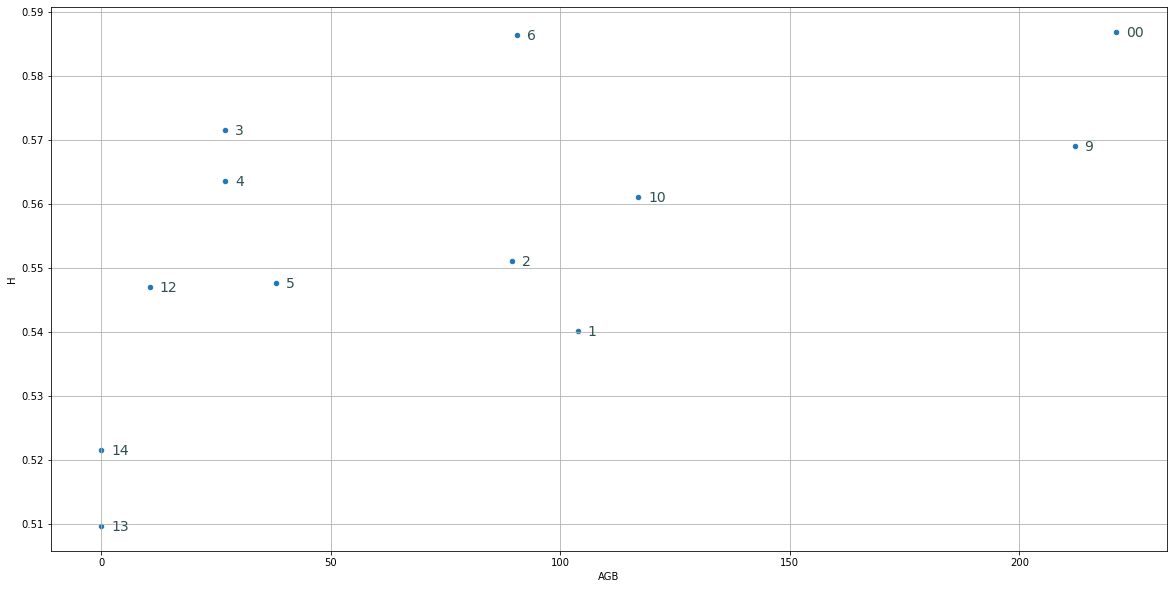

In [55]:
# Estudio intro polarimetrico

anotattedScatter(dataSAOCOM, 'AGB', 'H')

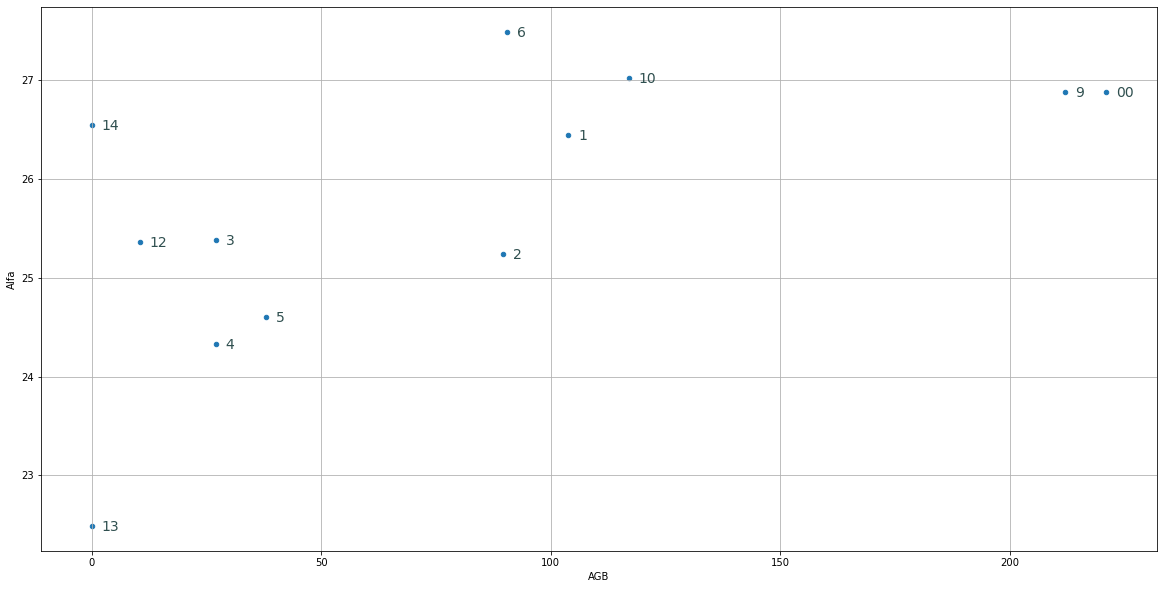

In [56]:
anotattedScatter(dataSAOCOM, 'AGB', 'Alfa')

# plt.scatter(dataSAOCOM['AGB'], dataSAOCOM['Alfa'])
# plt.ylim([0, 90])

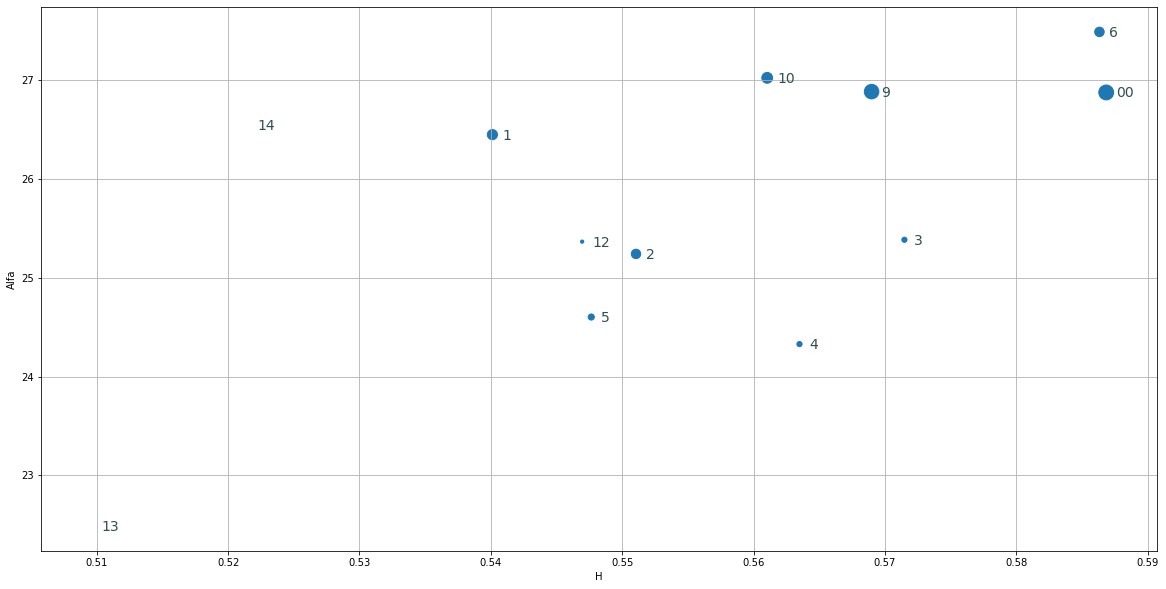

In [57]:
# anotattedScatter(dataSAOCOM, 'H', 'Alfa')


anotattedBubbleScatter(dataSAOCOM, 'H', 'Alfa', 'AGB')

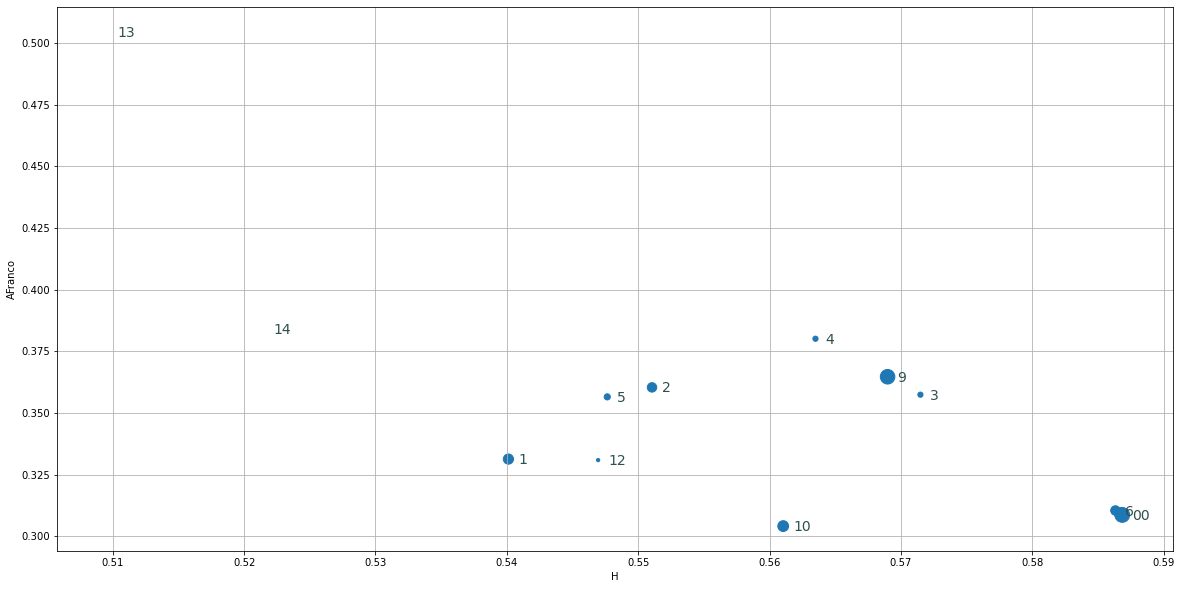

In [58]:
anotattedBubbleScatter(dataSAOCOM, 'H', 'AFranco', 'AGB')

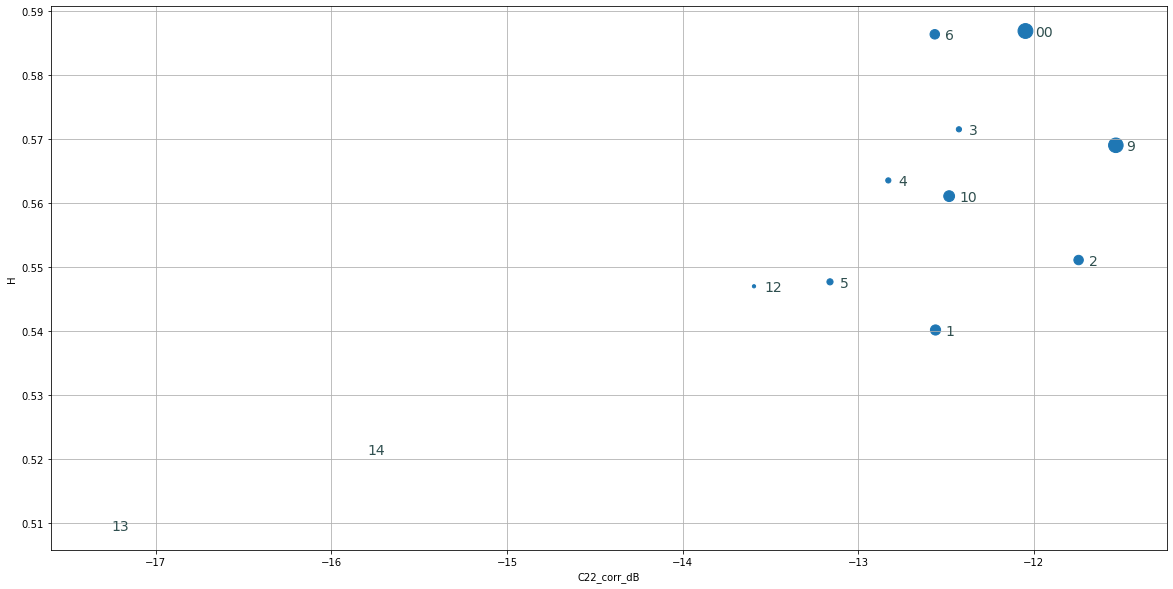

In [59]:
anotattedBubbleScatter(dataSAOCOM, 'C22_corr_dB', 'H', 'AGB')

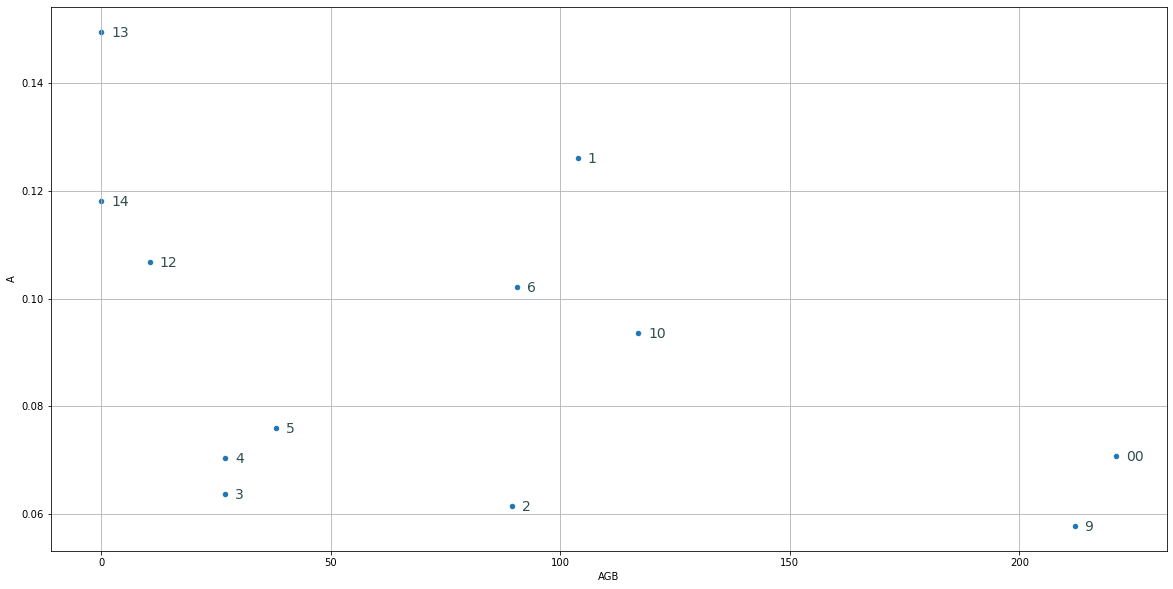

In [60]:
anotattedScatter(dataSAOCOM, 'AGB', 'A')

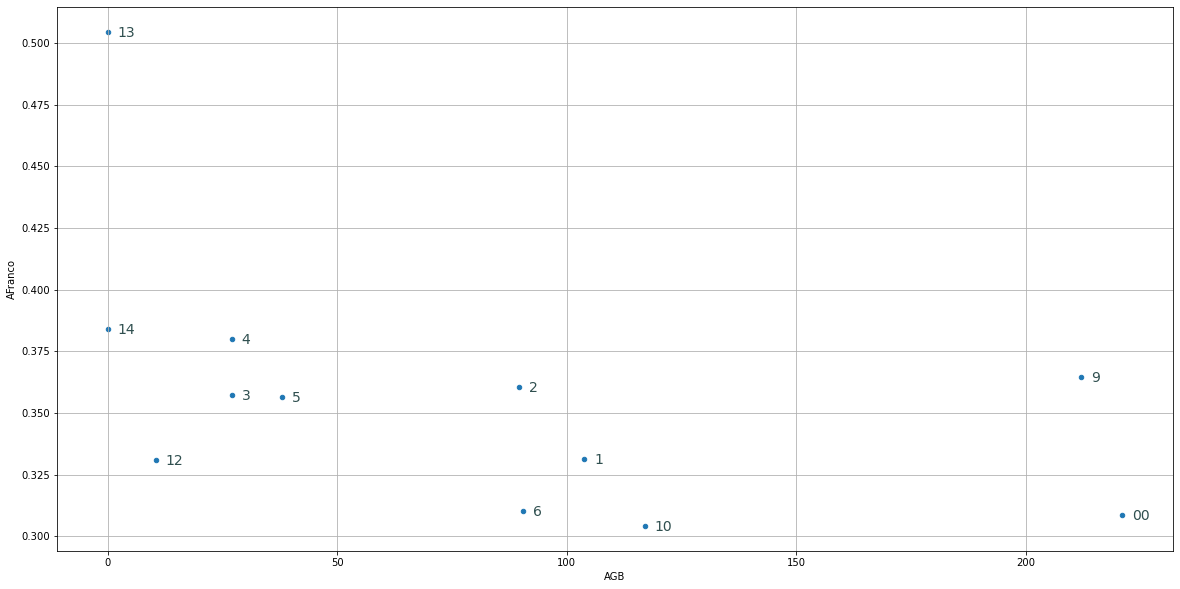

In [61]:
anotattedScatter(dataSAOCOM, 'AGB', 'AFranco')

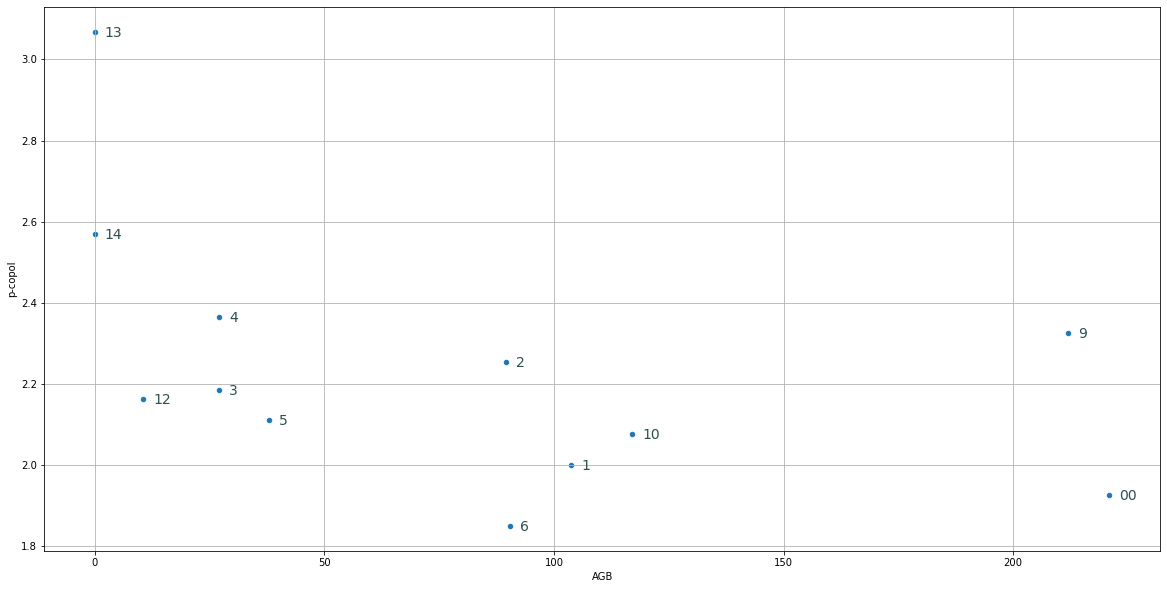

In [62]:
anotattedScatter(dataSAOCOM, 'AGB', 'p-copol')

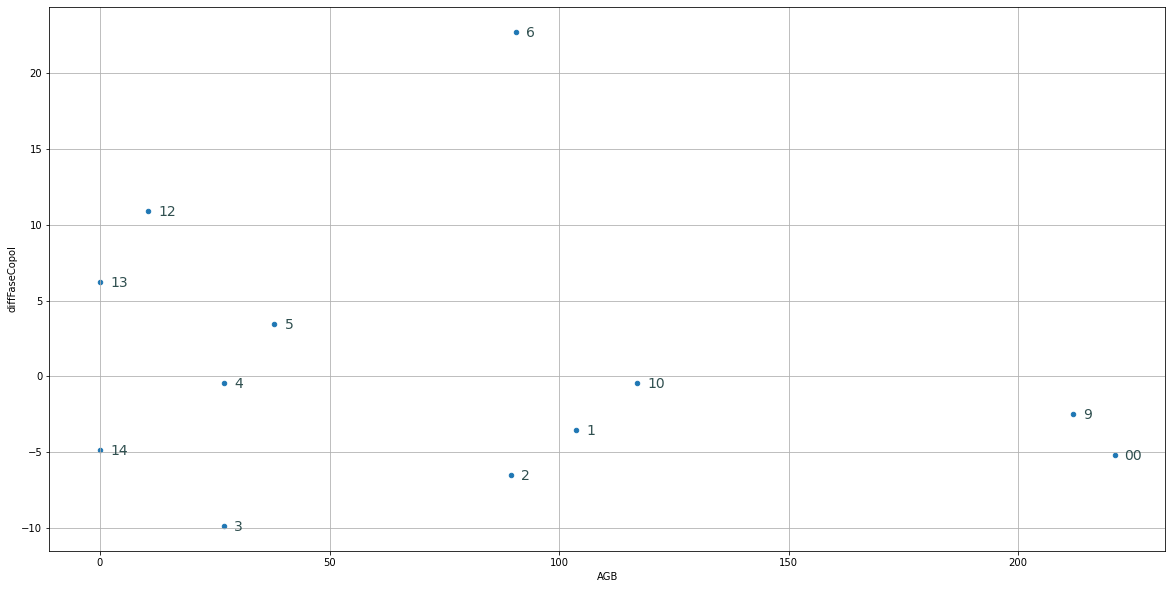

In [63]:
anotattedScatter(dataSAOCOM, 'AGB', 'diffFaseCopol')
# dataSAOCOM['diffFaseCopol']

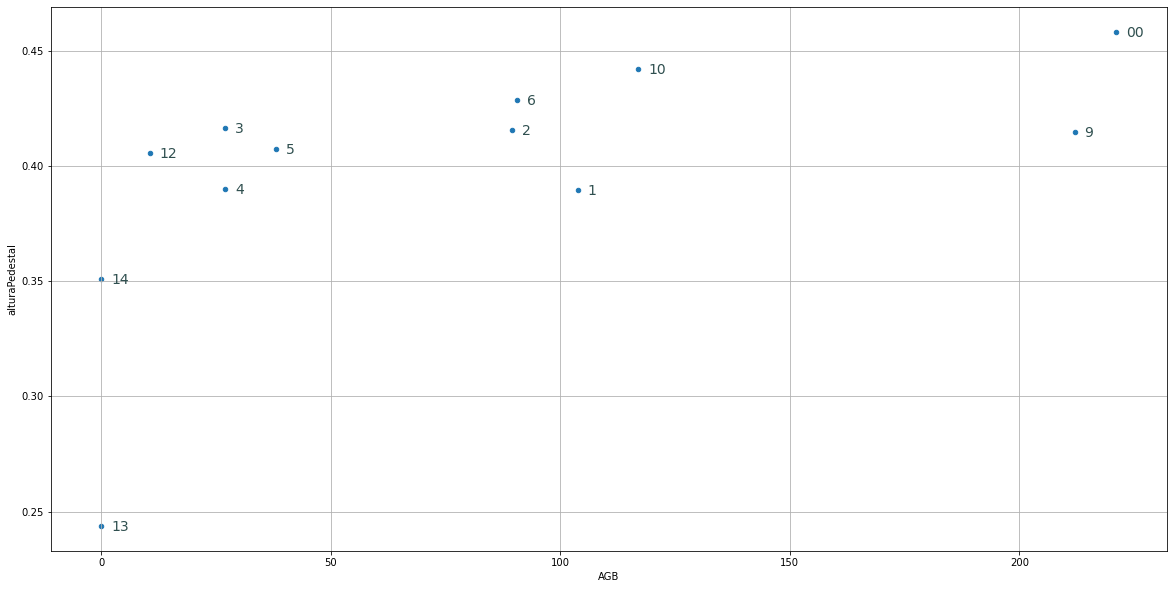

In [64]:
anotattedScatter(dataSAOCOM, 'AGB', 'alturaPedestal')

# dataSAOCOM['alturaPedestal'] = dataSAOCOM['T'].apply(lambda row: alturaPedestal(row))
# dataSAOCOM['corrCopol'] = dataSAOCOM['C'].apply(lambda row: corrCopol(row))
# dataSAOCOM['factorConformidad'] = dataSAOCOM['C'].apply(lambda row: factorConformidad(row))
# dataSAOCOM['gamma'] = dataSAOCOM['C'].apply(lambda row: gamma(row))

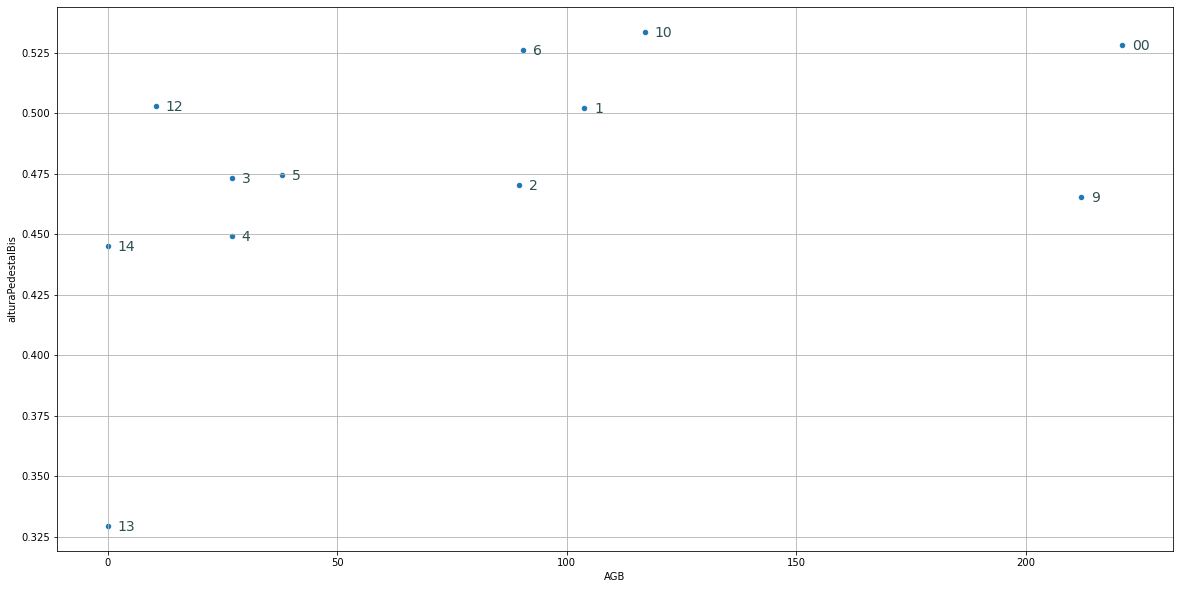

In [65]:
anotattedScatter(dataSAOCOM, 'AGB', 'alturaPedestalBis')

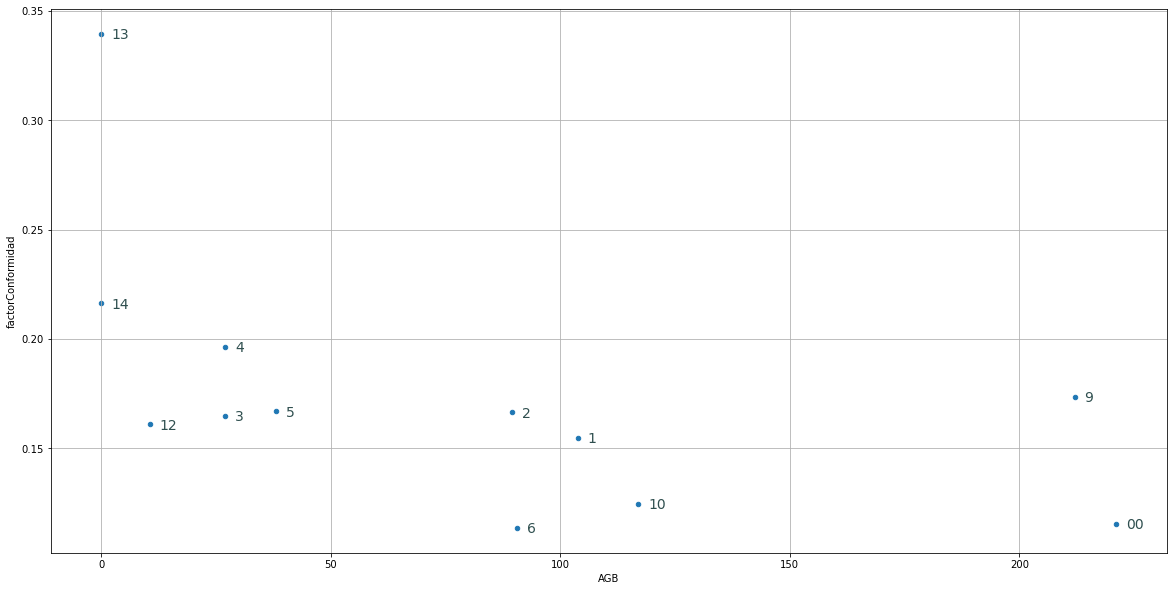

In [66]:
anotattedScatter(dataSAOCOM, 'AGB', 'factorConformidad')


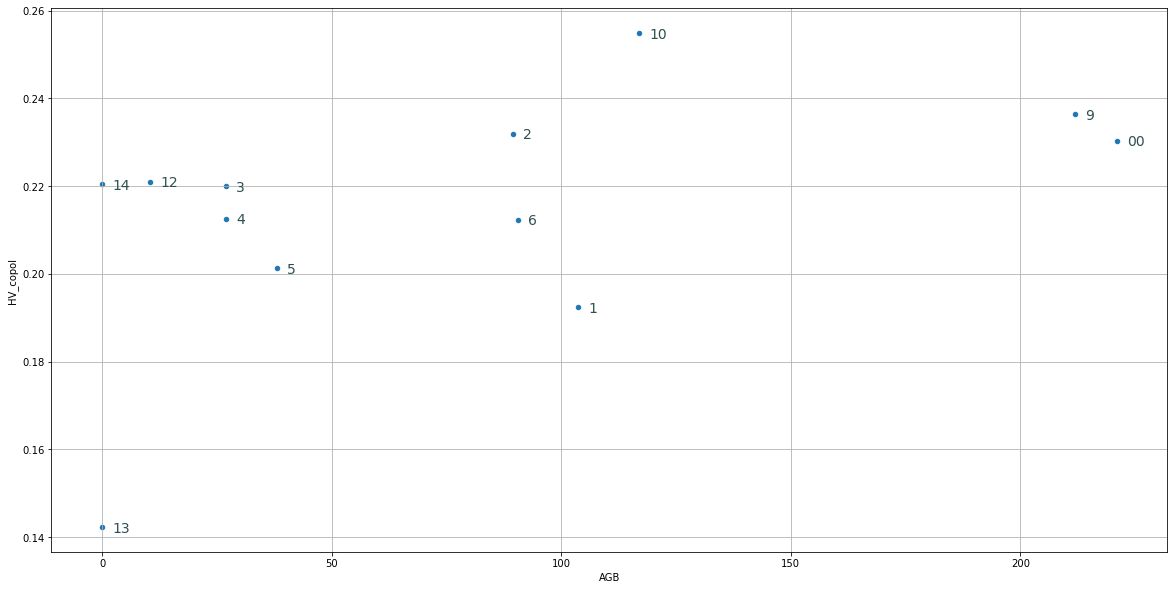

In [67]:
anotattedScatter(dataSAOCOM, 'AGB', 'HV_copol')

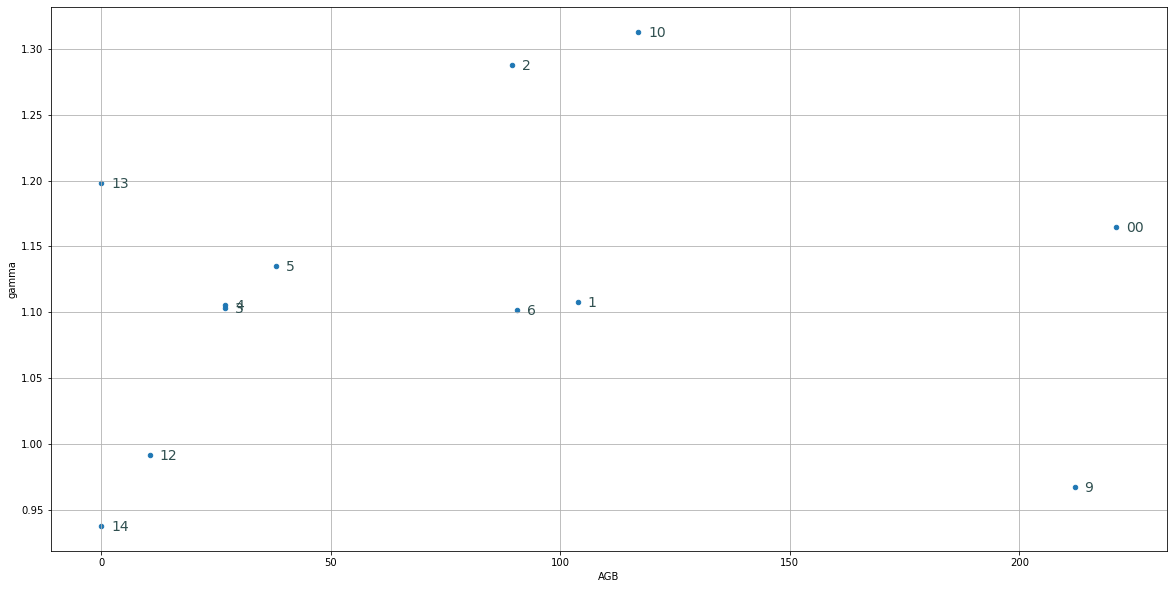

In [68]:
anotattedScatter(dataSAOCOM, 'AGB', 'gamma')

In [69]:
# anotattedScatter(dataSAOCOM, 'HV_copol', 'alturaPedestal')

In [70]:
# Inferencia

In [71]:
RANDOM_SEED = 8927
# rng = np.random.default_rng(RANDOM_SEED)
# size = 200
# true_intercept = 1
# true_slope = 2

# x = np.linspace(0, 1, size)
# # y = a + b*x
# true_regression_line = true_intercept + true_slope * x
# # add noise
# y = true_regression_line + rng.normal(scale=0.5, size=size)

In [72]:
dataSAOCOM.columns

Index(['NAME', 'Biomasa_nire_m3/ha', 'Bio_nire_std', 'Bio_total_std', 'AGB',
       'C11', 'C12r', 'C12i', 'C13r', 'C13i', 'C22', 'C23r', 'C23i', 'C33',
       'ang', 'C11_std', 'C12r_std', 'C12i_std', 'C13r_std', 'C13i_std',
       'C22_std', 'C23r_std', 'C23i_std', 'C33_std', 'ang_std', 'ENL_C3',
       'NDVI', 'NDVI_std', 'C11_corr', 'C12r_corr', 'C12i_corr', 'C13r_corr',
       'C13i_corr', 'C22_corr', 'C23r_corr', 'C23i_corr', 'C33_corr',
       'C11_corr_dB', 'C22_corr_dB', 'C33_corr_dB', 'C', 'T', 'H', 'Alfa', 'A',
       'AFranco', 'p-copol', 'geom_intens', 'diffFaseCopol', 'alturaPedestal',
       'alturaPedestalBis', 'absHHVV', 'corrCopol', 'factorConformidad',
       'gamma', 'HV_copol'],
      dtype='object')

In [73]:
# Estimacion error sigma en dB

dataSAOCOM['C22_sigma_dB'] = dB(dataSAOCOM['C22_corr'] + dataSAOCOM['C22_std']) - dataSAOCOM['C22_corr_dB'] #tradicional

# std2 = np.sqrt((dataSAOCOM['C22_corr']**2/dataSAOCOM['ENL_C3']))
dataSAOCOM['C22_sigma2_dB'] = dB(dataSAOCOM['C22_corr'] + np.sqrt((dataSAOCOM['C22_corr']**2/dataSAOCOM['ENL_C3']))) - dataSAOCOM['C22_corr_dB'] #Mati

In [74]:
dataSAOCOM['C22_sigma2_dB'].values

array([0.89294106, 0.7434056 , 1.00373766, 1.11141665, 0.79034622,
       1.0071212 , 1.03669373, 1.17789229, 0.6804458 , 0.8242322 ,
       0.70483133, 1.0808535 ])

In [75]:
dataSAOCOM.columns

Index(['NAME', 'Biomasa_nire_m3/ha', 'Bio_nire_std', 'Bio_total_std', 'AGB',
       'C11', 'C12r', 'C12i', 'C13r', 'C13i', 'C22', 'C23r', 'C23i', 'C33',
       'ang', 'C11_std', 'C12r_std', 'C12i_std', 'C13r_std', 'C13i_std',
       'C22_std', 'C23r_std', 'C23i_std', 'C33_std', 'ang_std', 'ENL_C3',
       'NDVI', 'NDVI_std', 'C11_corr', 'C12r_corr', 'C12i_corr', 'C13r_corr',
       'C13i_corr', 'C22_corr', 'C23r_corr', 'C23i_corr', 'C33_corr',
       'C11_corr_dB', 'C22_corr_dB', 'C33_corr_dB', 'C', 'T', 'H', 'Alfa', 'A',
       'AFranco', 'p-copol', 'geom_intens', 'diffFaseCopol', 'alturaPedestal',
       'alturaPedestalBis', 'absHHVV', 'corrCopol', 'factorConformidad',
       'gamma', 'HV_copol', 'C22_sigma_dB', 'C22_sigma2_dB'],
      dtype='object')

Text(0, 0.5, 'AGB [Th/Ha]')

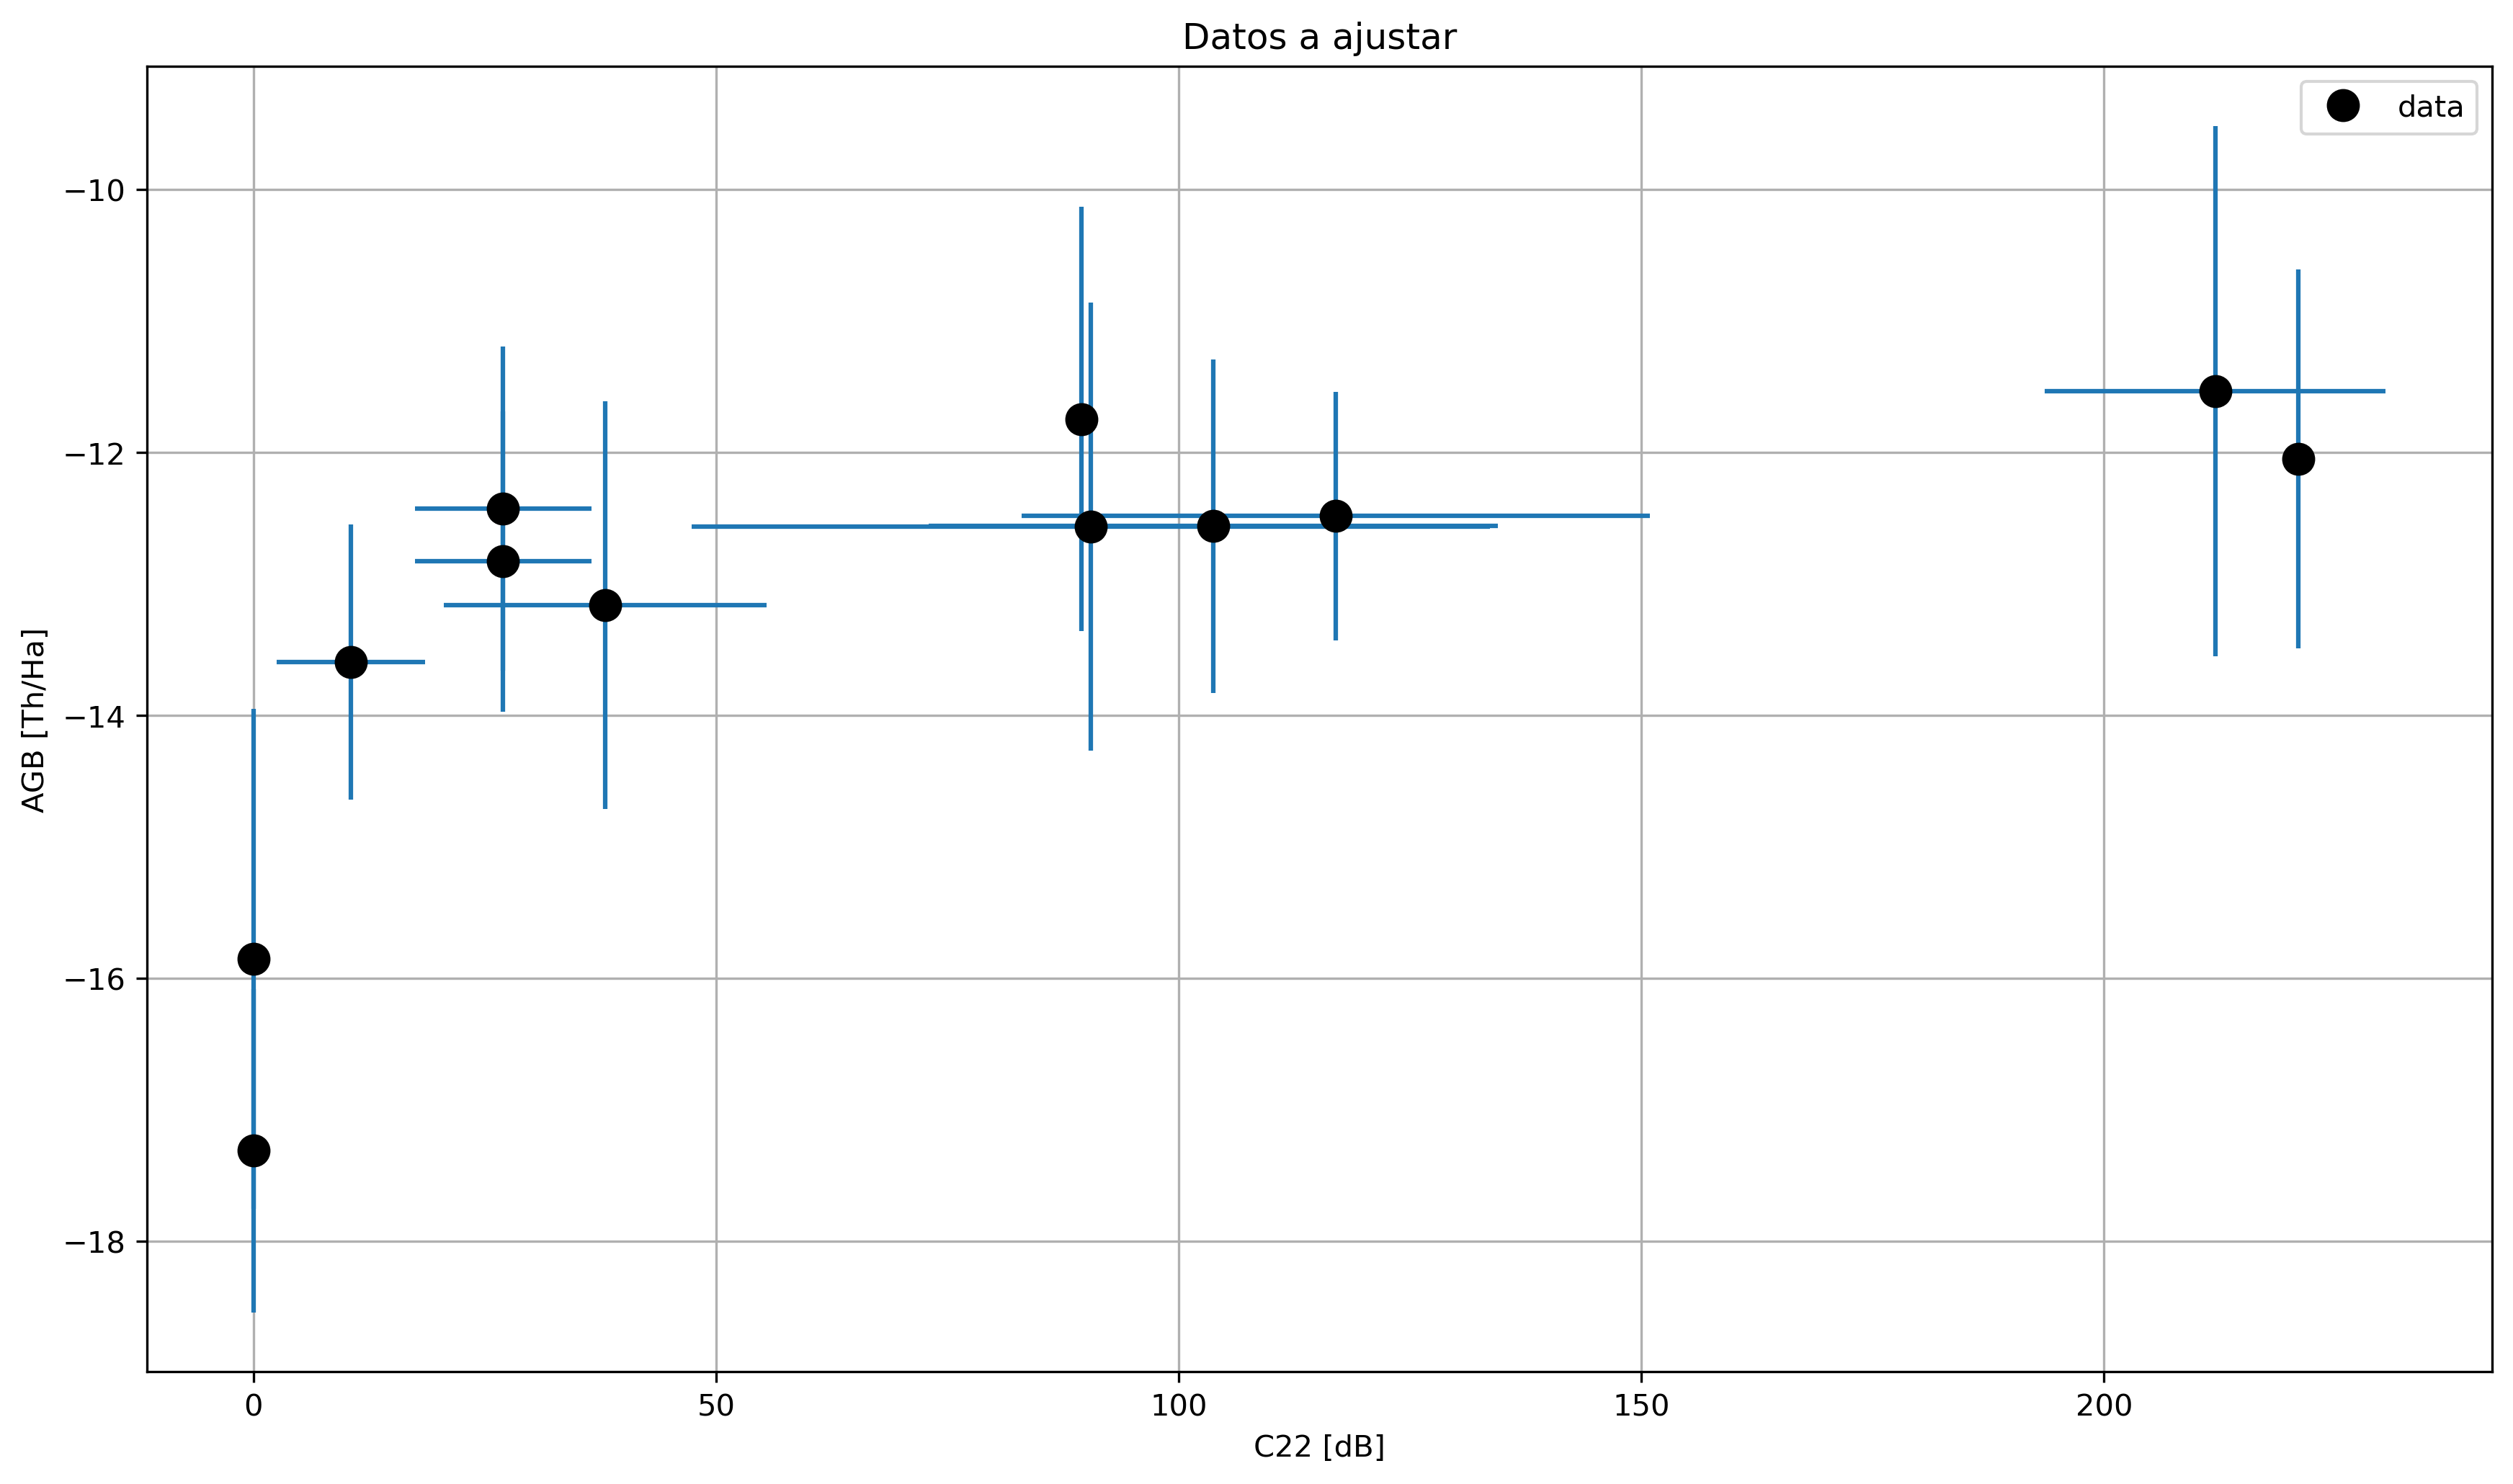

In [76]:
# Plor figura informe - datos a ajustar C22

y_original = dataSAOCOM.sort_values('C22_corr_dB')['AGB'] #dataSAOCOM.AGB.values #np.log10(dataSAOCOM.AGB.values)
x_original = dataSAOCOM.sort_values('C22_corr_dB')['C22_corr_dB']
y_err = dataSAOCOM.sort_values('C22_corr_dB')['Bio_total_std']
x_err = dataSAOCOM.sort_values('C22_corr_dB')['C22_sigma_dB']

# errorBarPlot(dataSAOCOM, col1, col2, col2_std)
plt.figure(figsize=(14, 8), dpi=300)

# plt.errorbar(x_raw, y_raw, label="data")
plt.errorbar(y_original, x_original, marker='o', mfc='k', mec='k', ms=10, mew=1, 
             yerr=x_err, xerr=y_err, linestyle="None", label="data")
plt.title("Datos a ajustar")
plt.legend(loc=0)
plt.xlabel("C22 [dB]")
plt.grid(True)
plt.ylabel("AGB [Th/Ha]")

# plt.savefig('informe/C22-Tofit.png')

In [77]:
# prepro inferencia

y_raw = np.log10(dataSAOCOM.sort_values('C22_corr_dB')['AGB']+1) #dataSAOCOM.AGB.values #np.log10(dataSAOCOM.AGB.values)
x_raw = dataSAOCOM.sort_values('C22_corr_dB')['C22_corr_dB']

def ida(x_, x_min, x_max):
    return (x_ - x_min) / (x_max - x_min)

def vuelta(x_, x_min, x_max):
    return x_*(x_max - x_min) + x_min

y_min = y_raw.min()
y_max = y_raw.max()
x_min = x_raw.min()
x_max = x_raw.max()

x_ = ida(x_raw, x_min, x_max)
y_ = ida(y_raw, y_min, y_max)

sigmaPorPuntoProy = ida(dataSAOCOM['C22_sigma2_dB'].values, y_min, y_max)

In [78]:
dataSAOCOM['C22_sigma2_dB']

0     0.892941
1     0.743406
2     1.003738
3     1.111417
4     0.790346
5     1.007121
6     1.036694
7     1.177892
8     0.680446
9     0.824232
10    0.704831
11    1.080854
Name: C22_sigma2_dB, dtype: float64

In [79]:
sigmaPorPuntoProy

array([0.38056553, 0.31683451, 0.4277863 , 0.47367837, 0.33684029,
       0.42922834, 0.44183196, 0.50200984, 0.29000147, 0.35128227,
       0.30039441, 0.46065256])

Text(0, 0.5, 'log(AGB)')

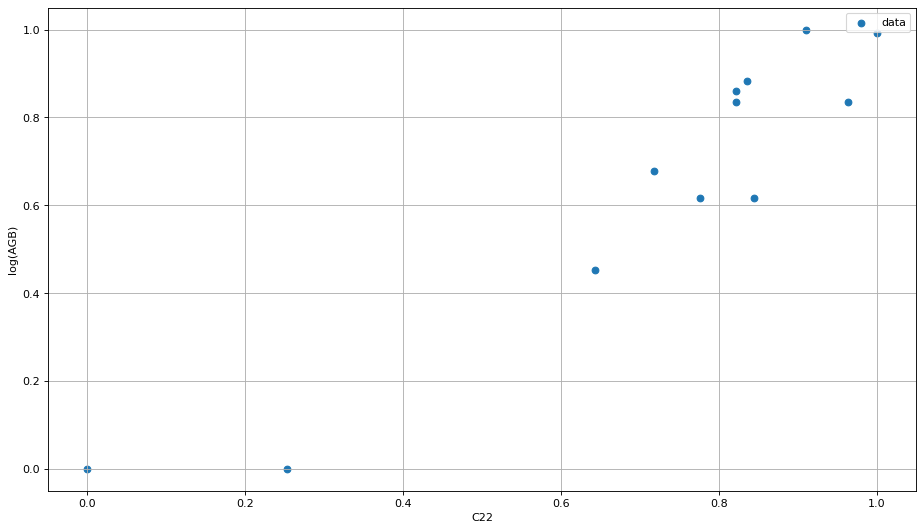

In [80]:
plt.figure(figsize=(14, 8), dpi=80)

plt.scatter(x_, y_, marker='o', label="data")
# plt.title("Posterior predictive regression lines")
plt.legend(loc=0)
plt.xlabel("C22")
plt.grid(True)
plt.ylabel("log(AGB)")

In [81]:

with pm.Model() as model:  # model specifications in PyMC3 are wrapped in a with-statement
    # Define priors
    # sigma = pm.HalfCauchy("sigma", beta=10) #testval=1.0
    # sigmaObs = pm.HalfNormal('sd', sigma=10)
    # sigmaObs = 0.25
    sigmaObs = sigmaPorPuntoProy
    # sigmaObs = ida(sigmaPorPunto, x_min, x_max)
    intercept = pm.Normal("Intercept", mu=0, sigma=10)
    x_coeff = pm.Normal("x", mu=0, sigma=10)

    # Define likelihood
    likelihood = pm.Normal("y", mu=intercept + x_coeff * x_, sigma=sigmaObs, observed=y_)

    # Inference!
    # draw 3000 posterior samples using NUTS sampling
    trace = pm.sample(5000, tune=1000) #return_inferencedata=True

    ppc = pm.sample_posterior_predictive(trace, var_names=['y', 'Intercept', 'x'], samples=10000)


/tmp/ipykernel_175547/947017104.py:16: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(5000, tune=1000) #return_inferencedata=True
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [x, Intercept]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 7 seconds.
The acceptance probability does not match the target. It is 0.8813919511998829, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8847662753362779, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8951808085703554, but should be close to 0.8. Try to increase the number of tuning steps.
/home/tele/miniconda3/envs/bayes/lib/python3.9/site-packages/pymc3/sampling.py:1689: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


/home/tele/miniconda3/envs/bayes/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'Intercept'}>,
        <AxesSubplot:title={'center':'Intercept'}>],
       [<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'x'}>]], dtype=object)

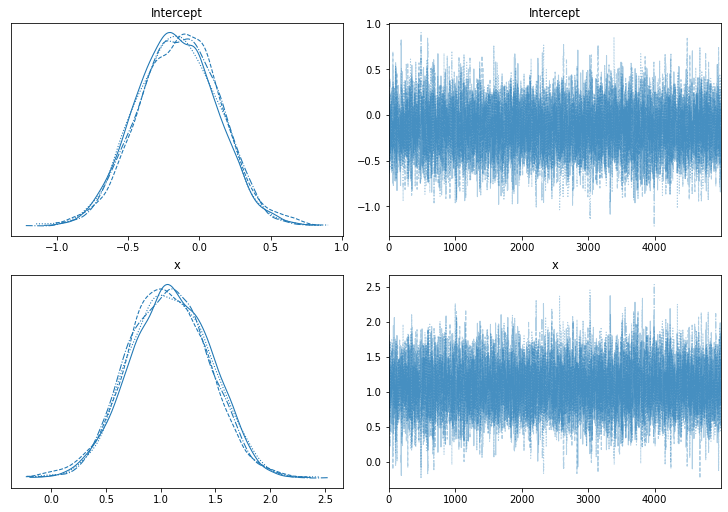

In [82]:
import arviz as az

ppc_y = ppc['y']

az.plot_trace(trace, figsize=(10, 7))

/home/tele/miniconda3/envs/bayes/lib/python3.9/site-packages/pymc3/plots/posteriorplot.py:59: DeprecationWarning: The `plot_posterior_predictive_glm` function will migrate to Arviz in a future release. 
Keep up to date with `ArviZ <https://arviz-devs.github.io/arviz/>`_ for future updates.
  warnings.warn(


Text(0, 0.5, 'log(AGB)')

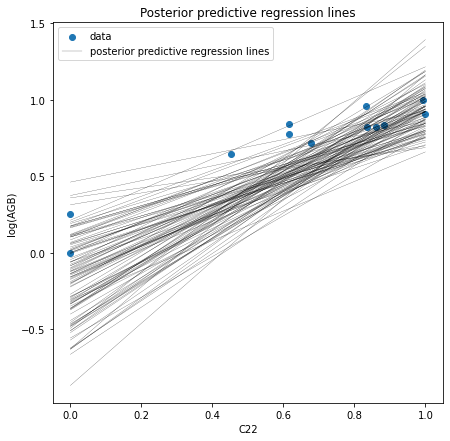

In [83]:
plt.figure(figsize=(7, 7))
# plt.scatter(x_, y, label="data")
plt.scatter(y_, x_, label="data")
pm.plot_posterior_predictive_glm(trace, samples=100, label="posterior predictive regression lines")
# plt.plot(x, true_regression_line, label="true regression line", lw=3.0, c="y")

# for i in range(30):
#     plt.plot(x_, ppc_y[i,:], ':k', alpha = 0.3) #,  label='sample'

plt.title("Posterior predictive regression lines")
plt.legend(loc=0)
plt.xlabel("C22")
plt.ylabel("log(AGB)")

Text(0, 0.5, 'C22')

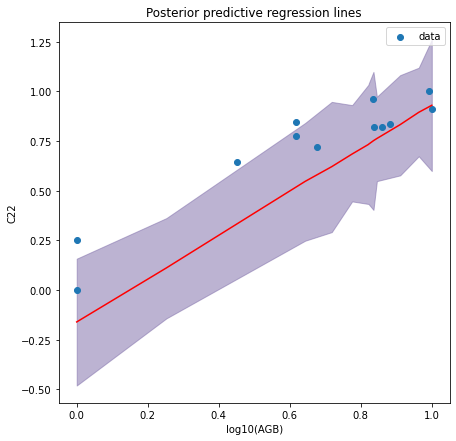

In [84]:
from scipy.stats.mstats import mquantiles

plt.figure(figsize=(7, 7))
qs = mquantiles(ppc_y, [0.25, 0.75], axis=0)
plt.fill_between(x_, *qs, alpha=0.5, color="#7A68A6")


plt.scatter(y_, x_, label="data")
plt.plot(x_, ppc_y.mean(axis=0), 'r')


ppc_y_mean = ppc_y.mean(axis=0)

plt.title("Posterior predictive regression lines")
plt.legend(loc=0)
plt.xlabel("log10(AGB)")
plt.ylabel("C22")

In [85]:
tr_intercept = ppc['Intercept']
tr_origen = ppc['x']

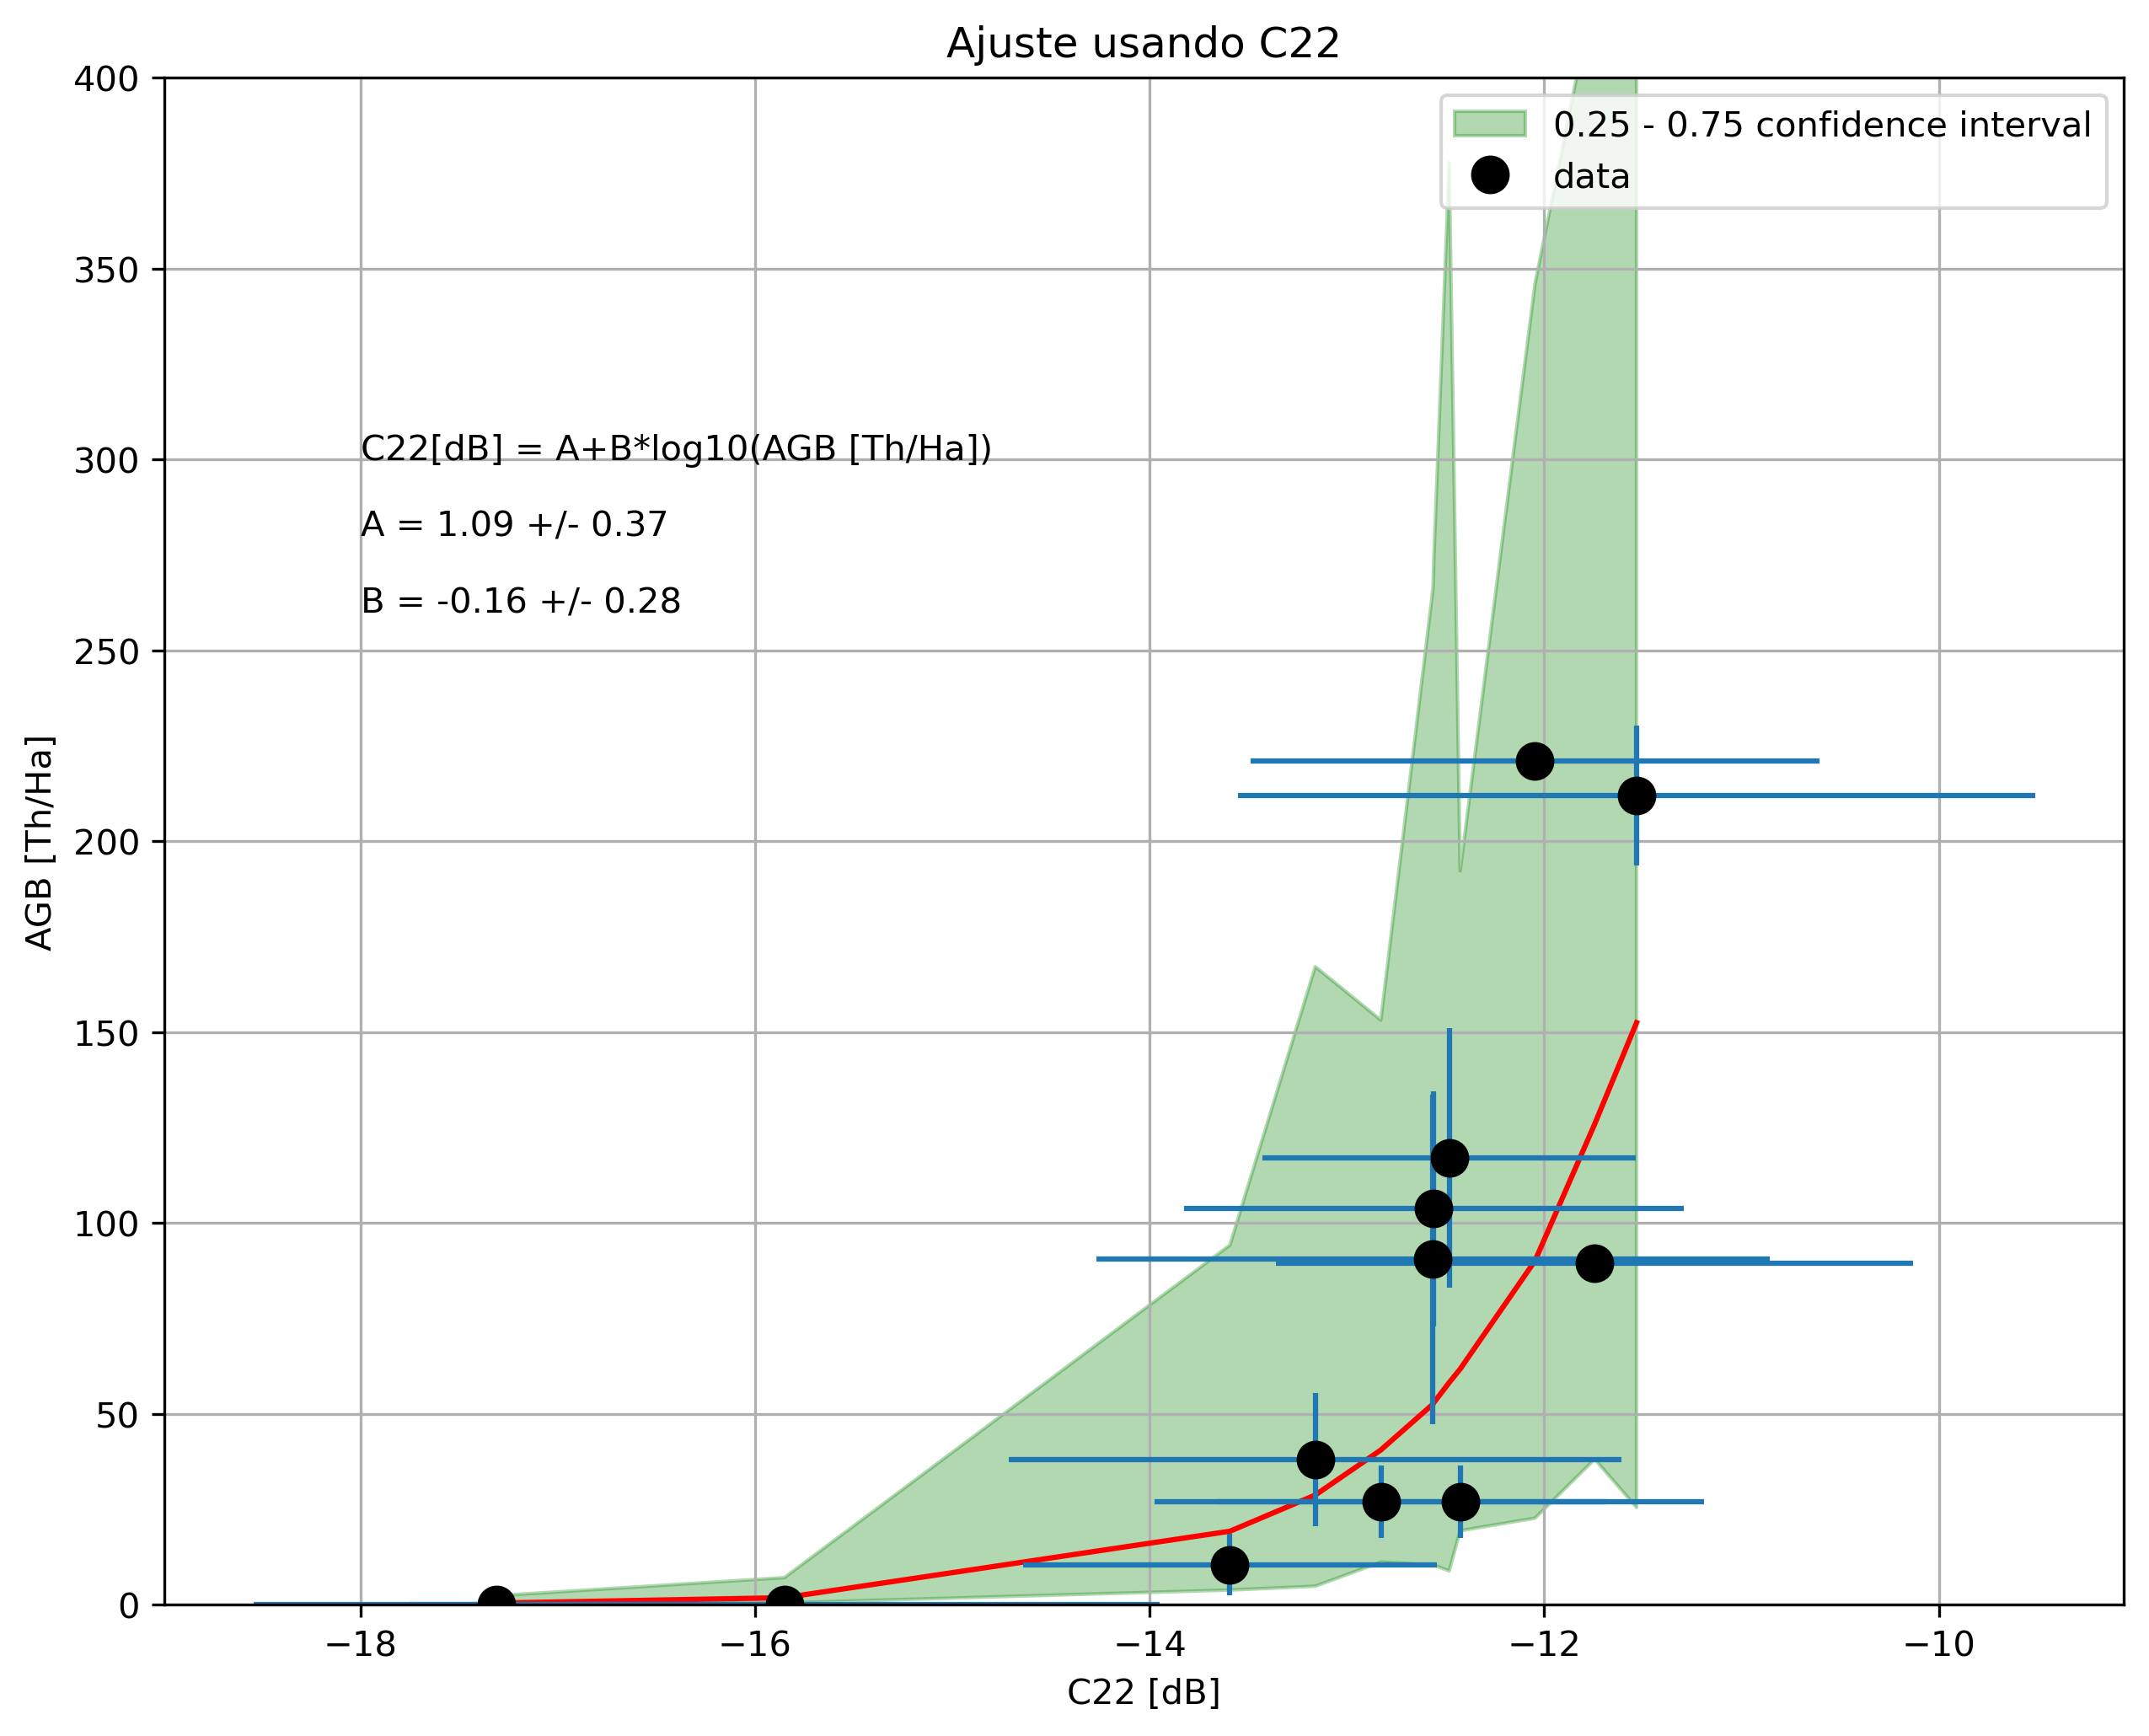

In [86]:
# y_vuelta = 10**vuelta(y_, y_min, y_max)
# x_vuelta = vuelta(x_, x_min, x_max)
# plt.scatter(x_vuelta, y_vuelta)
plt.figure(figsize=(10, 8), dpi=300)
plt.plot(x_original, 10**vuelta(ppc_y.mean(axis=0), y_min, y_max), 'r')
# plt.plot(x_, ppc_y.mean(axis=0), 'r')


plt.errorbar(x_original, y_original, marker='o', mfc='k', mec='k', ms=10, mew=1, 
             xerr=x_err, yerr=y_err, linestyle="None", label="data")
plt.title("Ajuste usando C22")
plt.ylim([0, 400])

plt.annotate('C22[dB] = A+B*log10(AGB [Th/Ha])', (-18, 300))
plt.annotate('A = '+str(np.around(tr_origen.mean(),2)) + ' +/- ' +str(np.around(tr_origen.std(),2)), (-18, 280))
plt.annotate('B = '+str(np.around(tr_intercept.mean(),2)) + ' +/- ' +str(np.around(tr_intercept.std(),2)), (-18, 260))

plt.xlabel("C22 [dB]")
plt.grid(True)
plt.ylabel("AGB [Th/Ha]")

qs = mquantiles(10**vuelta(ppc_y, y_min, y_max), [0.25, 0.75], axis=0)
plt.fill_between(x_original, *qs, alpha=0.3, color="g", label='0.25 - 0.75 confidence interval')
plt.legend(loc=1)

# plt.savefig('informe/C22-fit.png')


In [87]:
# inferencia H

def cwishrnd(sigma,df):
   '''
   generados MC Wishart
   '''
   n,m = sigma.shape
   if n is not m: 
      print('stats:wishrnd:BadCovariance')

   # Factor sigma unless that has already been done
   # if (nargin<3):
   #    [d,p] = cholcov(sigma,1);
   #    if p~=0
   #       error(message('stats:wishrnd:BadCovariance'))
   #    end
   # elseif ~isempty(sigma)
   #    if size(d,2) ~= n || size(d,1) > n
   #       error(message('stats:wishrnd:BadCovFactor'))
   #    end
   # else
   #    n = size(d,2);
   # end

   # if (~isscalar(df)) || (df<=0)
   #    error(message('stats:wishrnd:BadDf'))
   # elseif (df<=n-1) && (df~=round(df))
   #    error(message('stats:wishrnd:BadDf'));
   # end

   # For small degrees of freedom, generate the matrix using the definition
   # of the Wishart distribution; see Krzanowski for example

   d = np.linalg.cholesky(sigma) # suposicion de aca https://www.mathworks.com/help/stats/cholcov.html

   if (df <= 81+n):
      # x = randn(df,size(d,1)) * d;
      
      # x = (np.random.randn(df,d.shape[0]) + 1j*np.random.randn(df,d.shape[0]))/np.sqrt(2) * d # MODIFICACiON
      x = np.matmul((np.random.randn(df,d.shape[0]) + 1j*np.random.randn(df,d.shape[0]))/np.sqrt(2), d.T)

   
   return np.matmul(np.conj(x.T), x)
   # Otherwise use the Smith & Hocking procedure
   # W.B. Smith and R.R. Hocking, “Algorithm AS 53: Wishart Variate Generator”, Applied Statistics, vol. 21, pp. 341-345, 1972.
   # else
   #    % Load diagonal elements with square root of chi-square variates
   #    a = diag(sqrt(chi2rnd(df-(0:n-1))));

   #    # Load upper triangle with independent normal (0, 1) variates
   #    a(itriu(n)) = randn(n*(n-1)/2,1);

   #    # Desired matrix is D'(A'A)D
   #    x = a(:,1:size(d,1))*d;
   # end

   # a = x' * x;


   # # --------- get indices of upper triangle of p-by-p matrix
   # function d=itriu(p)

   # d=ones(p*(p-1)/2,1);
   # d(1+cumsum(0:p-2))=p+1:-1:3;
   # d = cumsum(d);

def ruidoH(sigma, df):
    '''
    Estima con MC el std de H    
    '''
    H_dist = np.zeros(10000)
    for i in range(10000):
        C_sample = cwishrnd(sigma,df)/df
        H_dist[i] = H(C_sample)

    # plt.hist(H_dist)
    # print(H(sigma))
    return np.std(H_dist)


def ruidoH_Q(sigma, df, q_mas=0.75, q_menos=0.25):
    '''
    Estima con MC cuantile de la distribucion    
    '''
    H_dist = np.zeros(10000)
    for i in range(10000):
        C_sample = cwishrnd(sigma,df)/df
        H_dist[i] = H(C_sample)
    # mode = stats.mode(H_dist)
    q_up = np.quantile(H_dist, q_mas) - H_dist.mean()
    q_down = H_dist.mean() - np.quantile(H_dist, q_menos)

    return q_up, q_down

In [88]:
def H_std_calculation(row):
    return ruidoH(row['C'], int(row['ENL_C3']))

dataSAOCOM['H_std'] = dataSAOCOM.apply(lambda row: H_std_calculation(row), axis=1)

In [89]:
# def H_q_calculation(row):
#     return ruidoH_Q(row['C'], int(row['ENL_C3']))

# dataSAOCOM['H_up'], dataSAOCOM['H_down'] = dataSAOCOM.apply(lambda row: H_q_calculation(row), axis=1)

In [90]:
dataSAOCOM['H_std']

0     0.061883
1     0.047271
2     0.080266
3     0.088470
4     0.059512
5     0.074963
6     0.076301
7     0.095893
8     0.047989
9     0.061230
10    0.060373
11    0.091287
Name: H_std, dtype: float64

Text(0.5, 0, 'AGB [Th/Ha]')

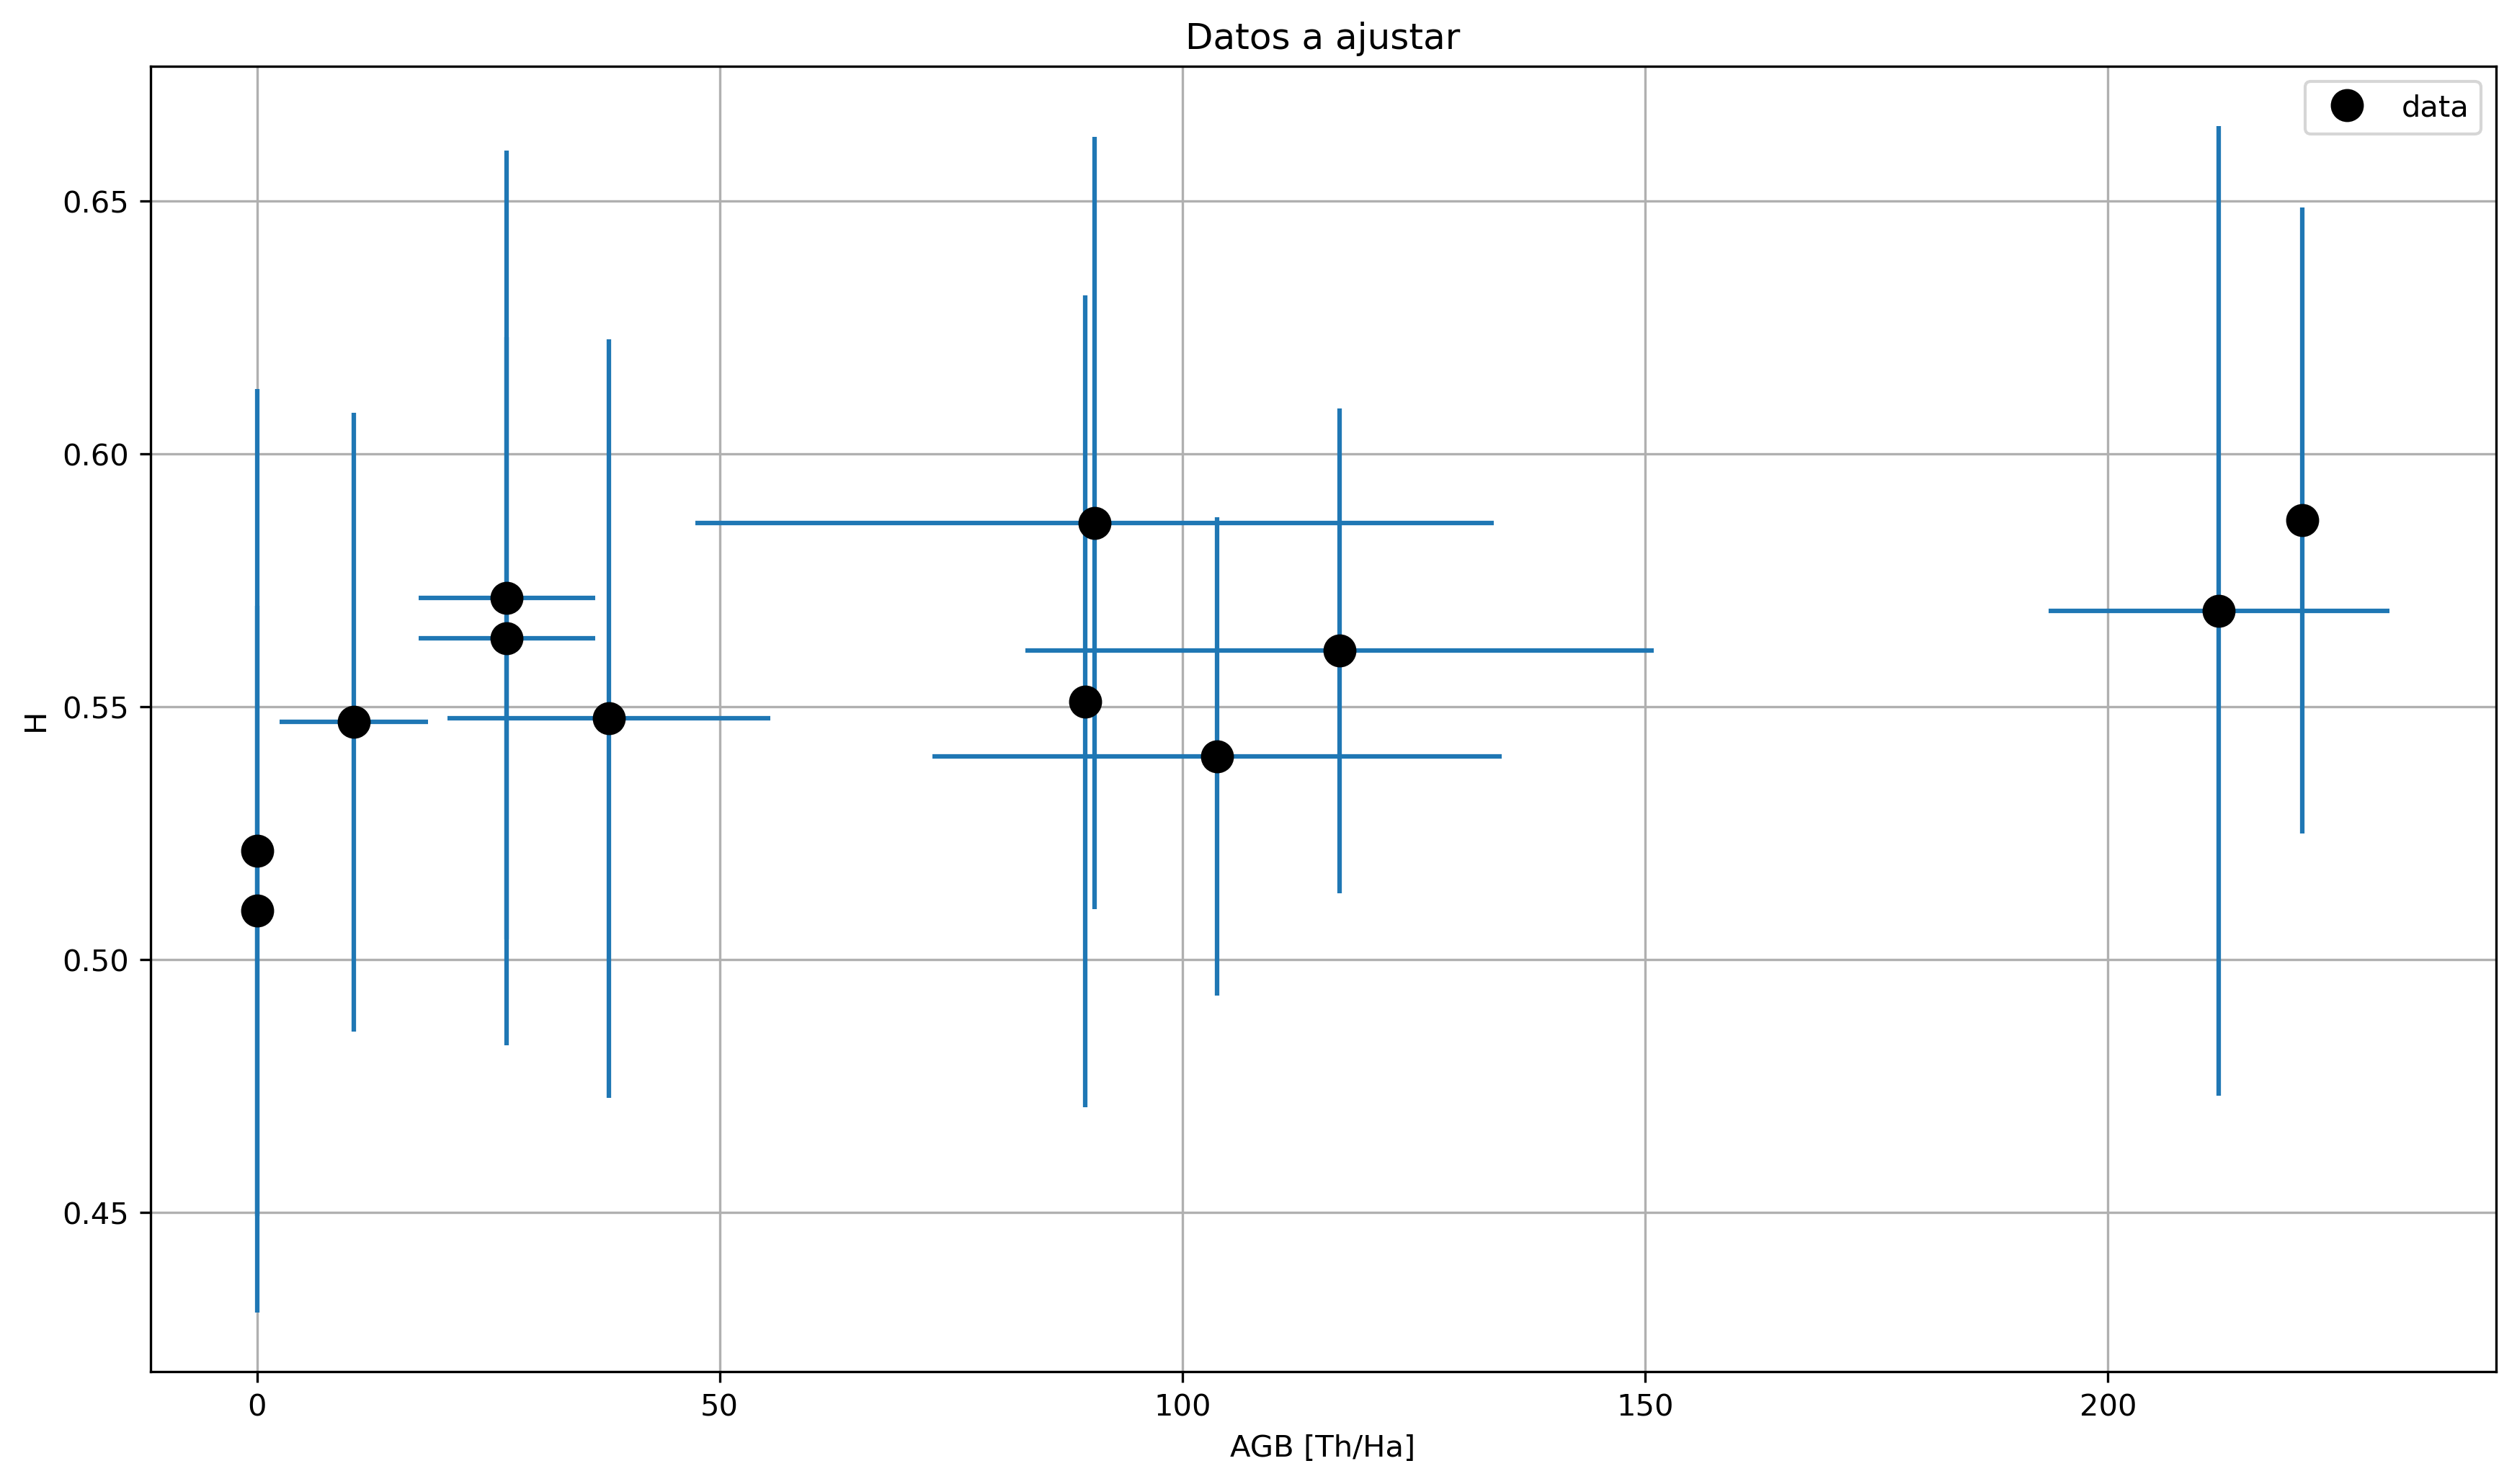

In [91]:
# Plor figura informe - datos a ajustar

y_original = dataSAOCOM.sort_values('H')['AGB'] #dataSAOCOM.AGB.values #np.log10(dataSAOCOM.AGB.values)
x_original = dataSAOCOM.sort_values('H')['H']
y_err = dataSAOCOM.sort_values('H')['Bio_total_std']
x_err = dataSAOCOM.sort_values('H')['H_std']

# errorBarPlot(dataSAOCOM, col1, col2, col2_std)
plt.figure(figsize=(14, 8), dpi=300)

# plt.errorbar(x_raw, y_raw, label="data")
plt.errorbar(y_original, x_original, marker='o', mfc='k', mec='k', ms=10, mew=1, 
             yerr=x_err, xerr=y_err, linestyle="None", label="data")
plt.title("Datos a ajustar")
plt.legend(loc=0)
plt.ylabel("H")
plt.grid(True)
plt.xlabel("AGB [Th/Ha]")

# plt.savefig('informe/H-Tofit.png')

In [92]:
y_ = np.log10(dataSAOCOM.sort_values('H')['AGB']+1)
x_ = dataSAOCOM.sort_values('H')['H']
x_errors = dataSAOCOM.sort_values('H')['H_std']

y_min = y_.min()
y_max = y_.max()
x_min = x_.min()
x_max = x_.max()

# y_ = (y_ - y_min) / (y_max - y_min)
# x_ = (x_ - x_min) / (x_max - x_min)

# y_min = y_raw.min()
# y_max = y_raw.max()
# x_min = x_raw.min()
# x_max = x_raw.max()

x_ = ida(x_, x_min, x_max)
y_ = ida(y_, y_min, y_max)
x_errors_proy = x_errors/(y_max - y_min)

In [93]:
x_errors_proy

10    0.025731
11    0.038906
1     0.020147
9     0.026096
5     0.031949
2     0.034209
8     0.020453
4     0.025364
7     0.040869
3     0.037705
6     0.032519
0     0.026374
Name: H_std, dtype: float64

Text(0, 0.5, 'log(AGB)')

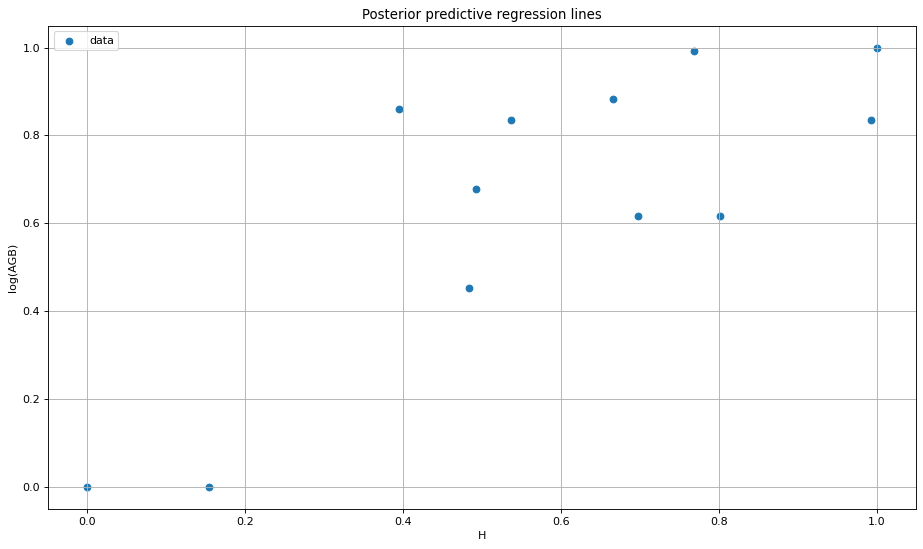

In [94]:
plt.figure(figsize=(14, 8), dpi=80)

plt.scatter(x_, y_, label="data")
plt.title("Posterior predictive regression lines")
plt.legend(loc=0)
plt.xlabel("H")
plt.grid(True)
plt.ylabel("log(AGB)")

In [95]:
with pm.Model() as model:  # model specifications in PyMC3 are wrapped in a with-statement
    # Define priors
    # sigma = pm.HalfCauchy("sigma", beta=10) #testval=1.0
    # sigmaObs = pm.HalfNormal('sd', sigma=10)
    # sigmaObs = 0.07
    sigmaObs = x_err
    # sigmaObs = x_errors_proy
    intercept = pm.Normal("Intercept", mu=0, sigma=10)
    x_coeff = pm.Normal("x", mu=0, sigma=10)

    # Define likelihood
    likelihood = pm.Normal("y", mu=intercept + x_coeff * x_, sigma=sigmaObs, observed=y_)

    # Inference!
    # draw 3000 posterior samples using NUTS sampling
    trace = pm.sample(5000, tune=1000) #return_inferencedata=True

    ppc = pm.sample_posterior_predictive(trace, var_names=['y', 'Intercept', 'x'], samples=10000)

/tmp/ipykernel_175547/4189762448.py:16: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(5000, tune=1000) #return_inferencedata=True
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [x, Intercept]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 6 seconds.
The acceptance probability does not match the target. It is 0.8901500589760719, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8831046929619931, but should be close to 0.8. Try to increase the number of tuning steps.
/home/tele/miniconda3/envs/bayes/lib/python3.9/site-packages/pymc3/sampling.py:1689: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


/home/tele/miniconda3/envs/bayes/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'Intercept'}>,
        <AxesSubplot:title={'center':'Intercept'}>],
       [<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'x'}>]], dtype=object)

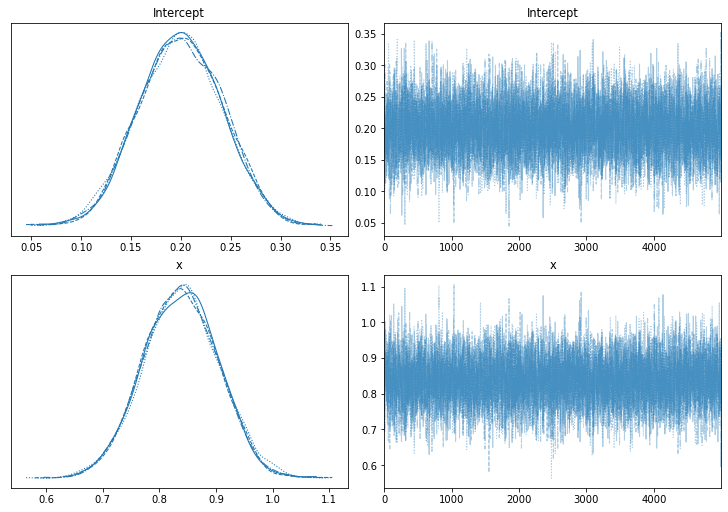

In [96]:
# import arviz as az

ppc_y = ppc['y']

az.plot_trace(trace, figsize=(10, 7))

/home/tele/miniconda3/envs/bayes/lib/python3.9/site-packages/pymc3/plots/posteriorplot.py:59: DeprecationWarning: The `plot_posterior_predictive_glm` function will migrate to Arviz in a future release. 
Keep up to date with `ArviZ <https://arviz-devs.github.io/arviz/>`_ for future updates.
  warnings.warn(


Text(0, 0.5, 'log(AGB)')

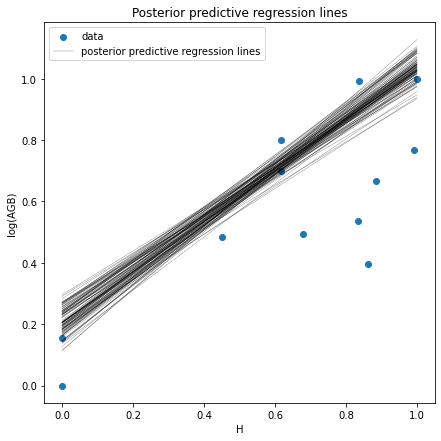

In [97]:
plt.figure(figsize=(7, 7))
# plt.scatter(x_, y, label="data")
plt.scatter(y_, x_, label="data")
pm.plot_posterior_predictive_glm(trace, samples=100, label="posterior predictive regression lines")
# plt.plot(x, true_regression_line, label="true regression line", lw=3.0, c="y")

# for i in range(30):
#     plt.plot(x_, ppc_y[i,:], ':k', alpha = 0.3) #,  label='sample'

plt.title("Posterior predictive regression lines")
plt.legend(loc=0)
plt.xlabel("H")
plt.ylabel("log(AGB)")

Text(0, 0.5, 'H')

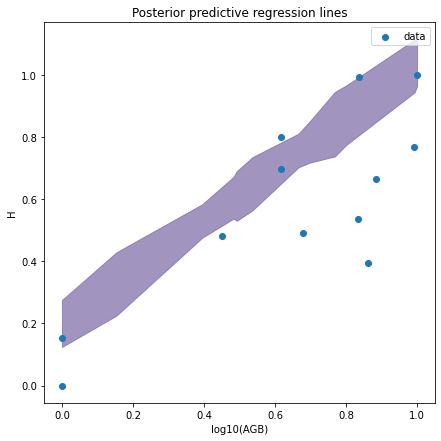

In [98]:
plt.figure(figsize=(7, 7))
qs = mquantiles(ppc_y, [0.15, 0.85], axis=0)
plt.fill_between(x_, *qs, alpha=0.7, color="#7A68A6")


plt.scatter(y_, x_, label="data")

# for i in range(1):
#     plt.plot(x_, ppc_y[i,:], ':k', alpha = 0.3) #,  label='sample'

plt.title("Posterior predictive regression lines")
plt.legend(loc=0)
plt.xlabel("log10(AGB)")
plt.ylabel("H")

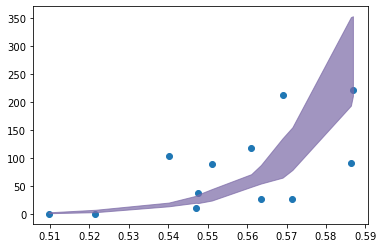

In [99]:
y_vuelta = 10**vuelta(y_, y_min, y_max)
x_vuelta = vuelta(x_, x_min, x_max)
plt.scatter(x_vuelta, y_vuelta)

qs = mquantiles(10**vuelta(ppc_y, y_min, y_max), [0.25, 0.75], axis=0)
plt.fill_between(x_vuelta, *qs, alpha=0.7, color="#7A68A6")

In [100]:
tr_intercept = ppc['Intercept']
tr_origen = ppc['x']

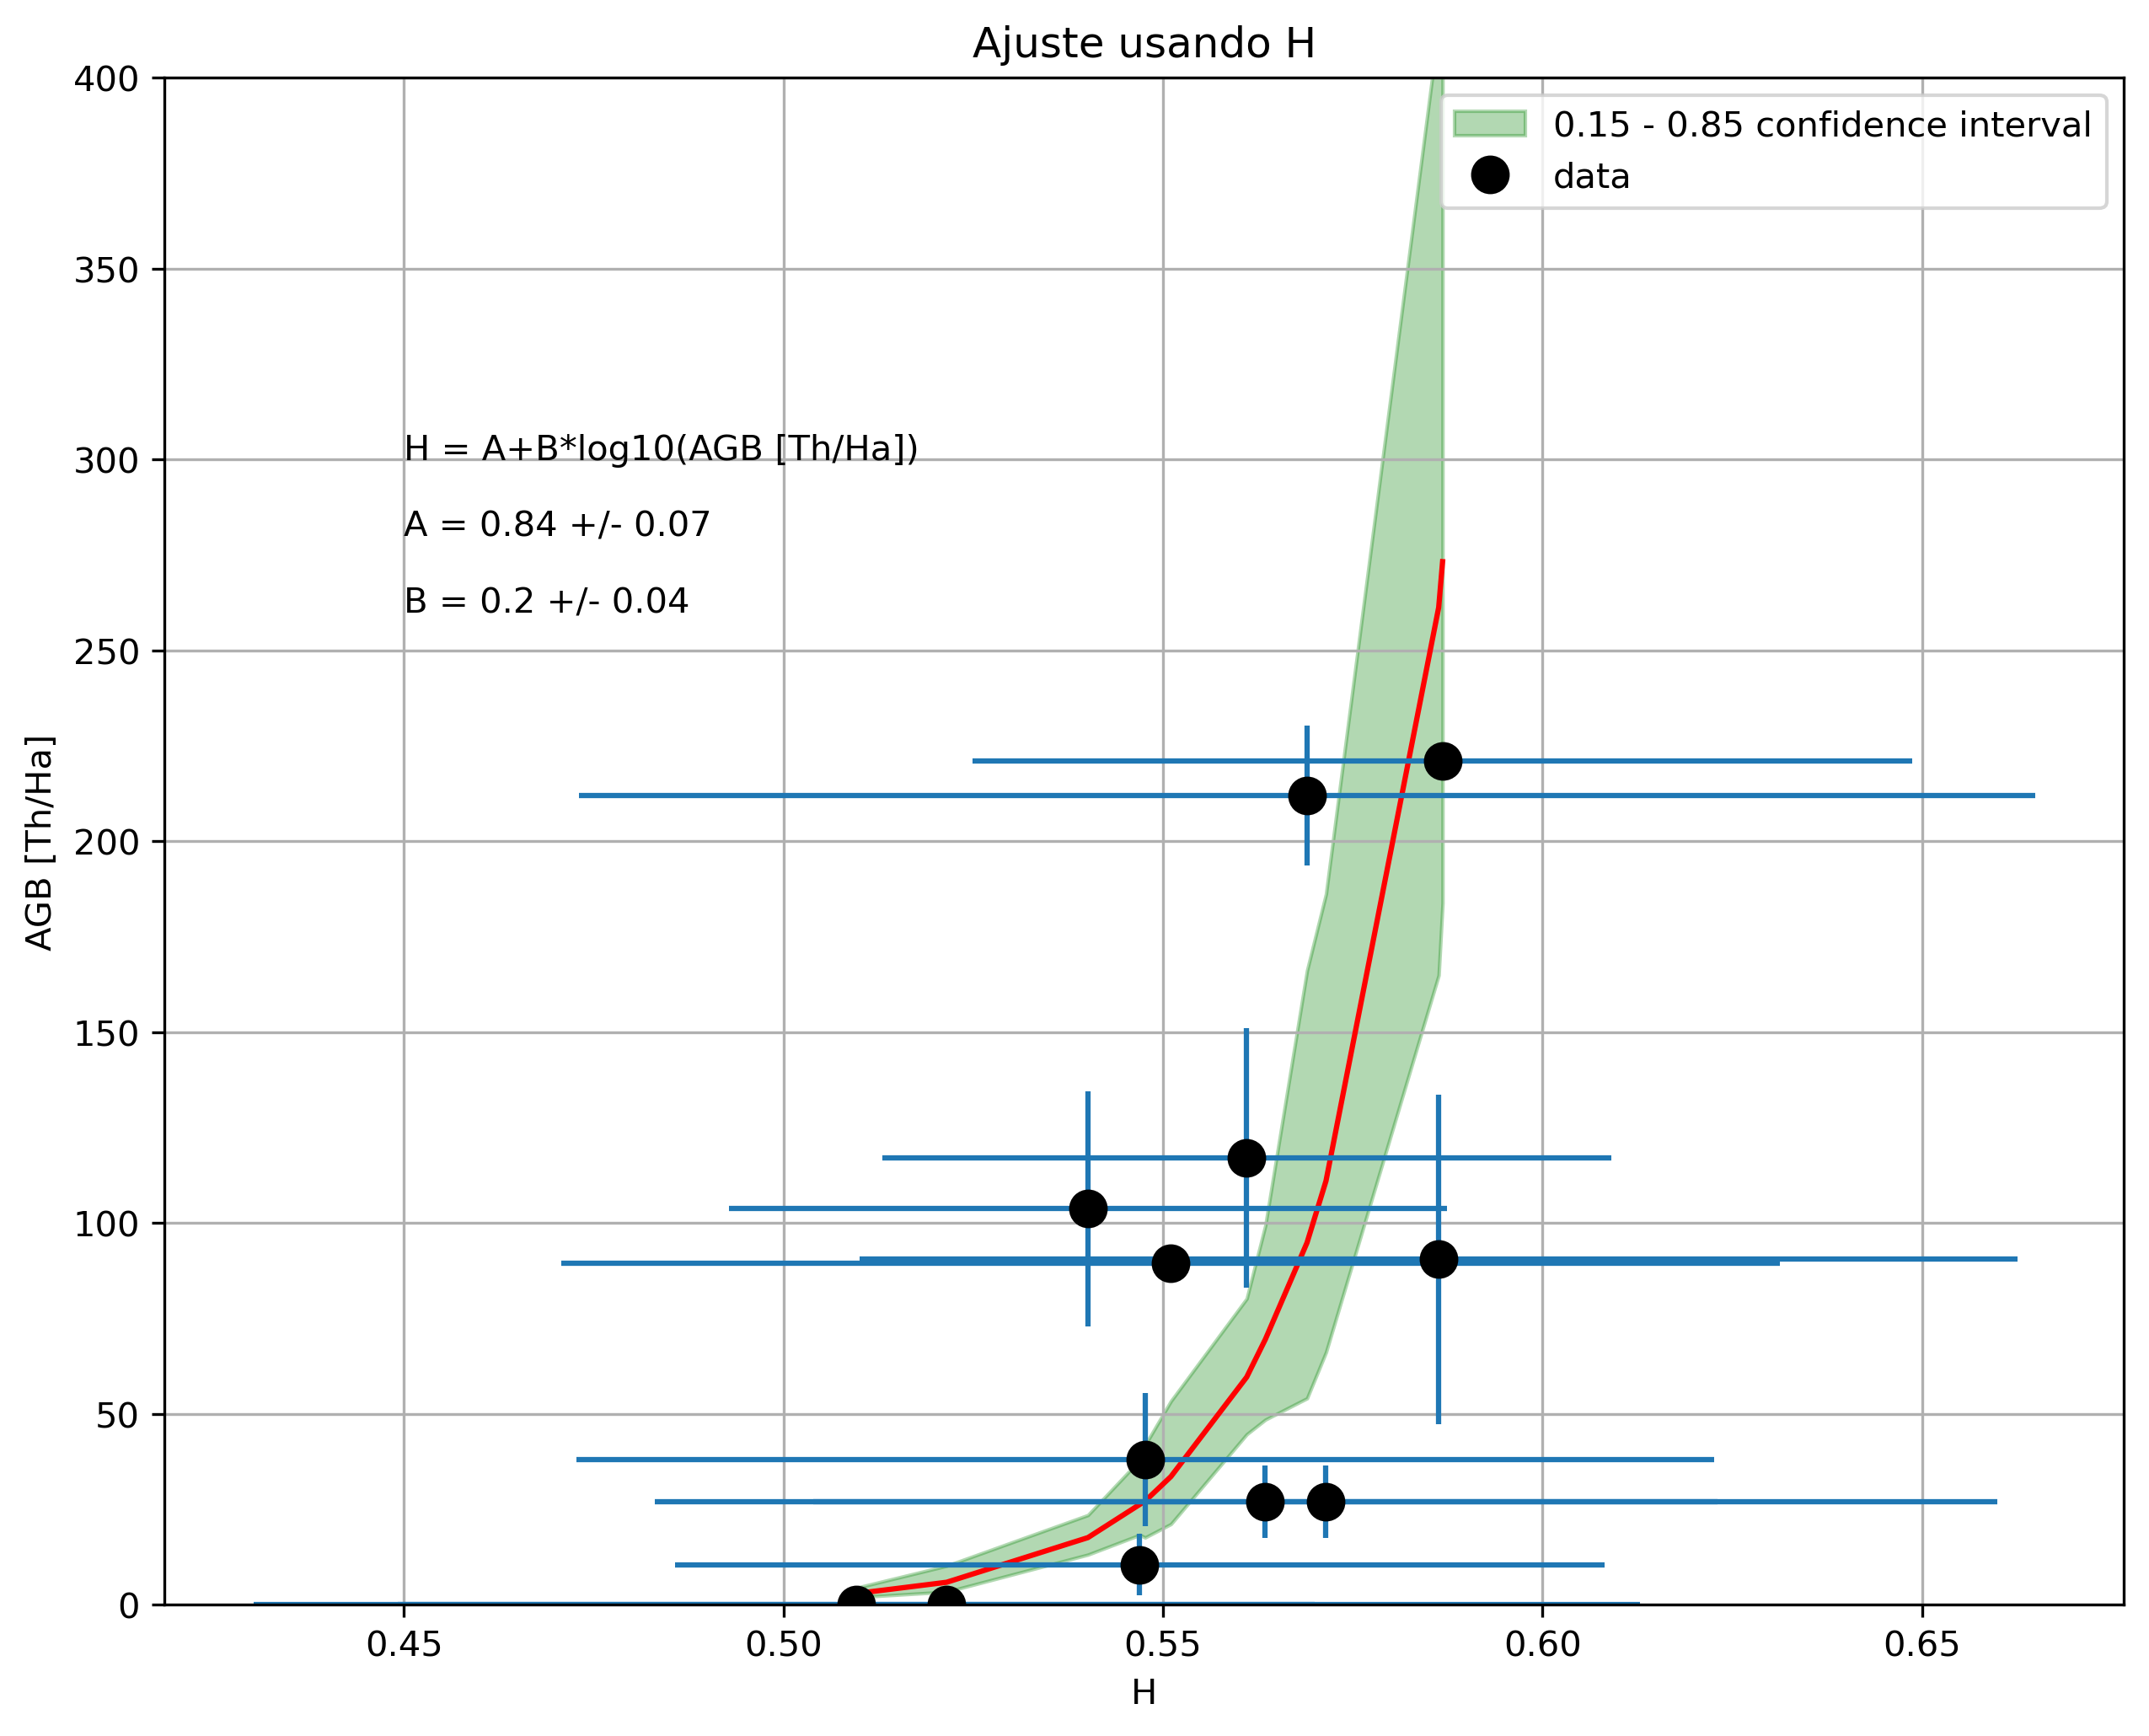

In [101]:
plt.figure(figsize=(10, 8), dpi=300)
plt.plot(x_original, 10**vuelta(ppc_y.mean(axis=0), y_min, y_max), 'r')
# plt.plot(x_, ppc_y.mean(axis=0), 'r')


plt.errorbar(x_original, y_original, marker='o', mfc='k', mec='k', ms=10, mew=1, 
             xerr=x_err, yerr=y_err, linestyle="None", label="data")
plt.title("Ajuste usando H")
plt.ylim([0, 400])

plt.annotate('H = A+B*log10(AGB [Th/Ha])', (0.45, 300))
plt.annotate('A = '+str(np.around(tr_origen.mean(),2)) + ' +/- ' +str(np.around(tr_origen.std(),2)), (0.45, 280))
plt.annotate('B = '+str(np.around(tr_intercept.mean(),2)) + ' +/- ' +str(np.around(tr_intercept.std(),2)), (0.45, 260))

plt.xlabel("H")
plt.grid(True)
plt.ylabel("AGB [Th/Ha]")

qs = mquantiles(10**vuelta(ppc_y, y_min, y_max), [0.15, 0.85], axis=0)
plt.fill_between(x_original, *qs, alpha=0.3, color="g", label='0.15 - 0.85 confidence interval')
plt.legend(loc=1)

plt.savefig('informe/H-fit.png')

In [ ]:
dataSentinelDes.columns

In [ ]:
dataSentinelDes['VH_sigma_dB'] = dB(dataSentinelDes['VH_corr'] + dataSentinelDes['VH_std']) - dataSentinelDes['VH_corr_dB'] #tradicional

KeyError: 'VH_sigma_dB'

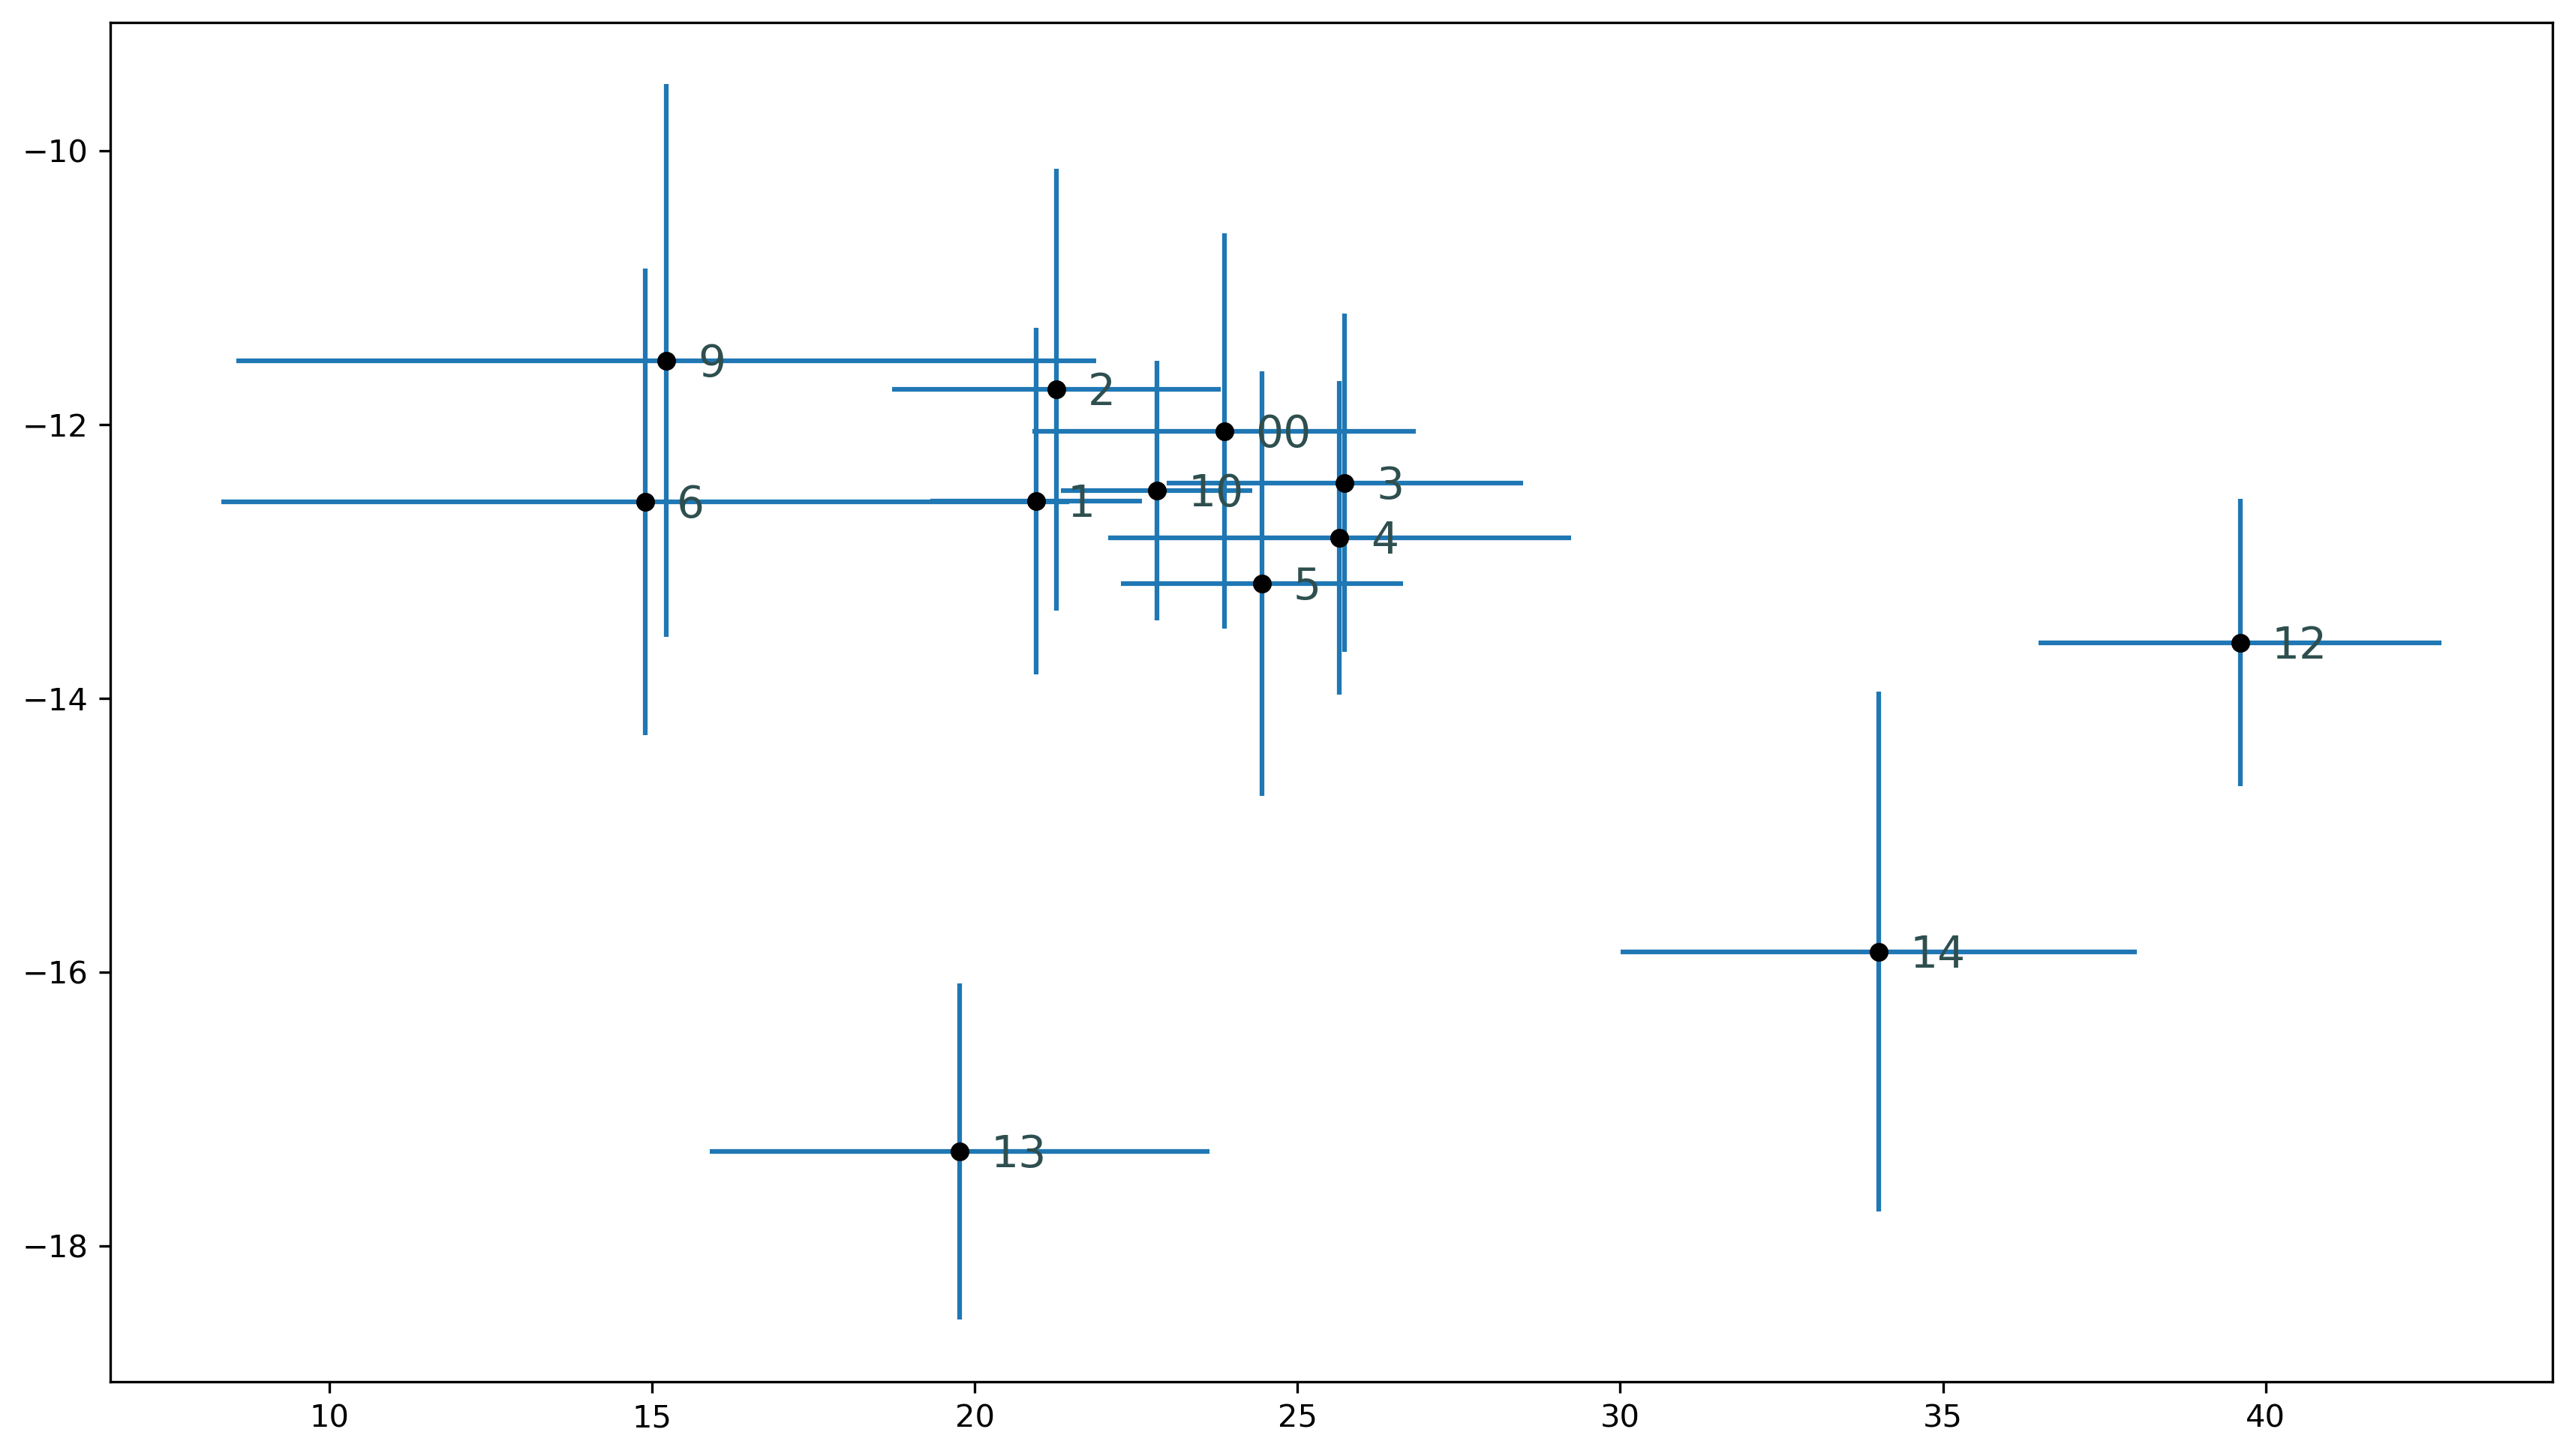

In [102]:
# datos correcion angulo

plt.figure(figsize=(14, 8), dpi=300)

y_original = dataSAOCOM['C22_corr_dB']
x_original = dataSAOCOM['ang']
y_err = dataSAOCOM['C22_sigma_dB']
x_err = dataSAOCOM['ang_std']

# plt.errorbar(x_raw, y_raw, label="data")
plt.errorbar(x_original, y_original, marker='o', mfc='k', mec='k', ms=5, mew=1, 
             yerr=y_err, xerr=x_err, linestyle="None", label="SAOCOM")

for i, txt in enumerate(dataSAOCOM.NAME):
    striped = txt.split('-')[1]
    plt.annotate(striped, (dataSAOCOM['ang'][i], dataSAOCOM['C22_corr_dB'][i]), xytext=(10,-5), textcoords='offset points',
                    family='sans-serif', fontsize=14, color='darkslategrey') 

y_original = dataSentinelDes['VH_corr_dB']
x_original = dataSentinelDes['LIA']
y_err = dataSentinelDes['VH_sigma_dB']
# x_err = dataSAOCOM['ang_std']

# plt.errorbar(x_raw, y_raw, label="data")
plt.errorbar(x_original, y_original, marker='o', mfc='r', mec='r', ms=5, mew=1, 
             yerr=y_err, linestyle="None", label="Sentinel 1")

for i, txt in enumerate(dataSentinelDes.NAME):
    striped = txt.split('-')[1]
    plt.annotate(striped, (dataSentinelDes['LIA'][i], dataSentinelDes['VH_corr_dB'][i]), xytext=(10,-5), textcoords='offset points',
                    family='sans-serif', fontsize=14, color='darkslategrey') 


plt.title("SAOCOM C22, Sentinel-1 VH vs LIA")
plt.legend(loc=0)
plt.ylabel("SAOCOM C22, Sentinel-1 VH [dB]")
plt.grid(True)
plt.xlabel("LIA [deg]")



# plt.savefig('informe/SAOCOM-Sentinel-LIAComparison.png')

In [ ]:
# from pandas.plotting import table # EDIT: see deprecation warnings below

# ax = plt.subplot(111, frame_on=False) # no visible frame
# ax.xaxis.set_visible(False)  # hide the x axis
# ax.yaxis.set_visible(False)  # hide the y axis

# table(ax, dataSAOCOM)  # where df is your data frame

# plt.savefig('mytable.png')

In [103]:
# Plor figura informe - HV Sentinel

y_original = dataSentinelDes['AGB'] #dataSAOCOM.AGB.values #np.log10(dataSAOCOM.AGB.values)
x_original = dataSentinelDes['VH_corr_dB']
y_err = dataSentinelDes['Bio_total_std']
x_err = dataSentinelDes['VH_sigma_dB']

# errorBarPlot(dataSAOCOM, col1, col2, col2_std)
plt.figure(figsize=(14, 8), dpi=300)

# plt.errorbar(x_raw, y_raw, label="data")
plt.errorbar(y_original, x_original, marker='o', mfc='k', mec='k', ms=10, mew=1, 
             yerr=x_err, xerr=y_err, linestyle="None", label="data")
plt.title("VH Sentinel")
plt.legend(loc=0)
plt.xlabel("VH [dB]")
plt.grid(True)
plt.ylabel("AGB [Th/Ha]")

plt.savefig('informe/HV-Sentinel-ToFit.png')

KeyError: 'VH_sigma_dB'

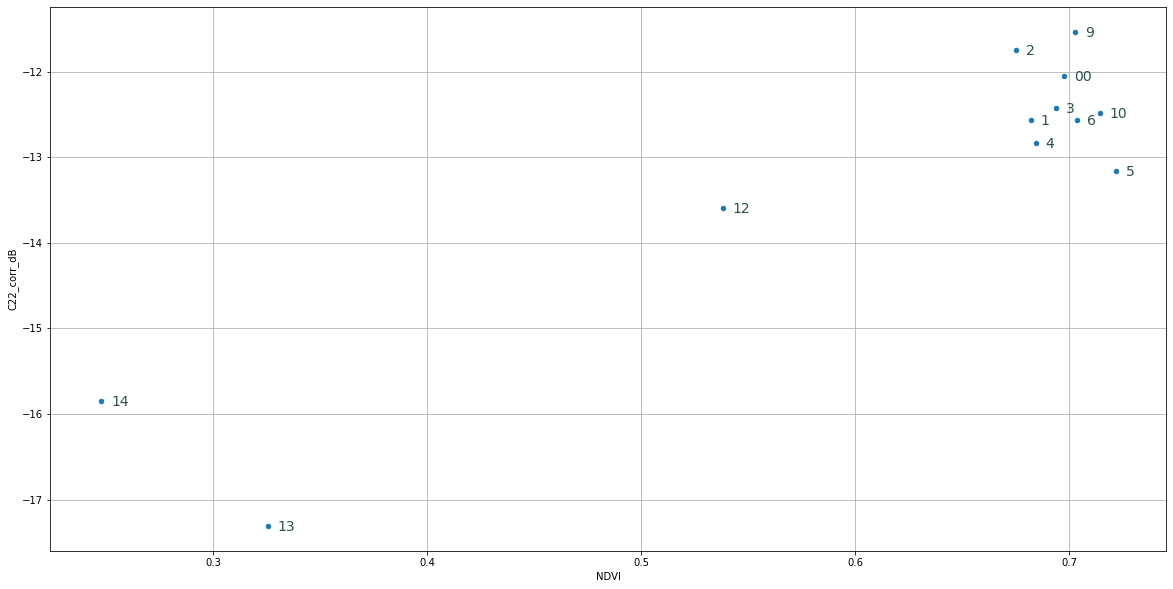

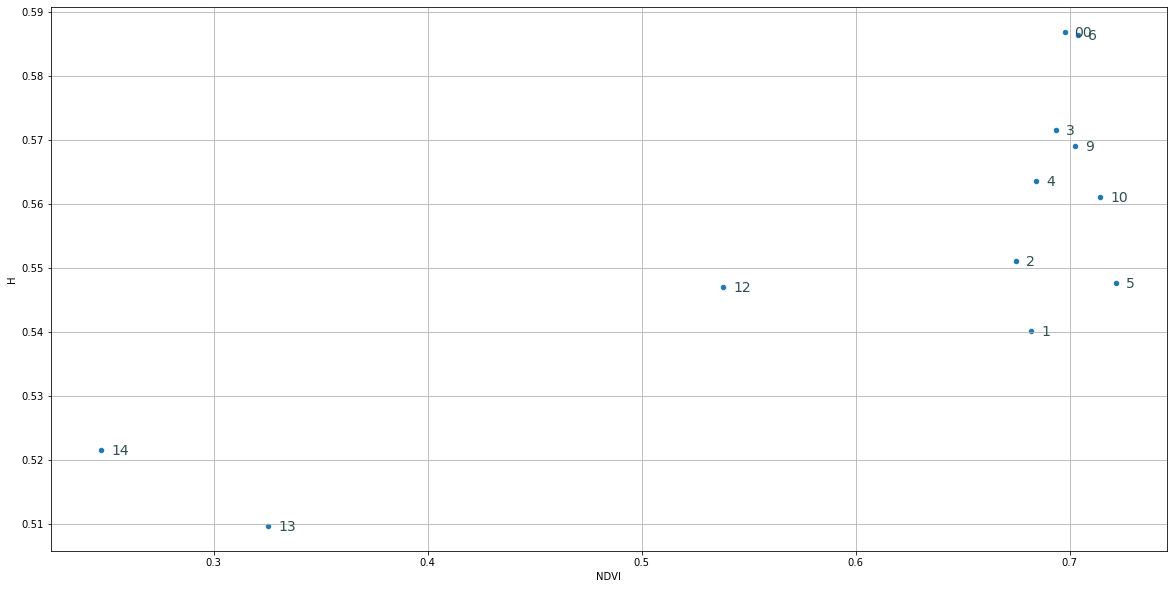

In [105]:
anotattedScatter(dataSAOCOM,'NDVI','C22_corr_dB')
anotattedScatter(dataSAOCOM,'NDVI','H')

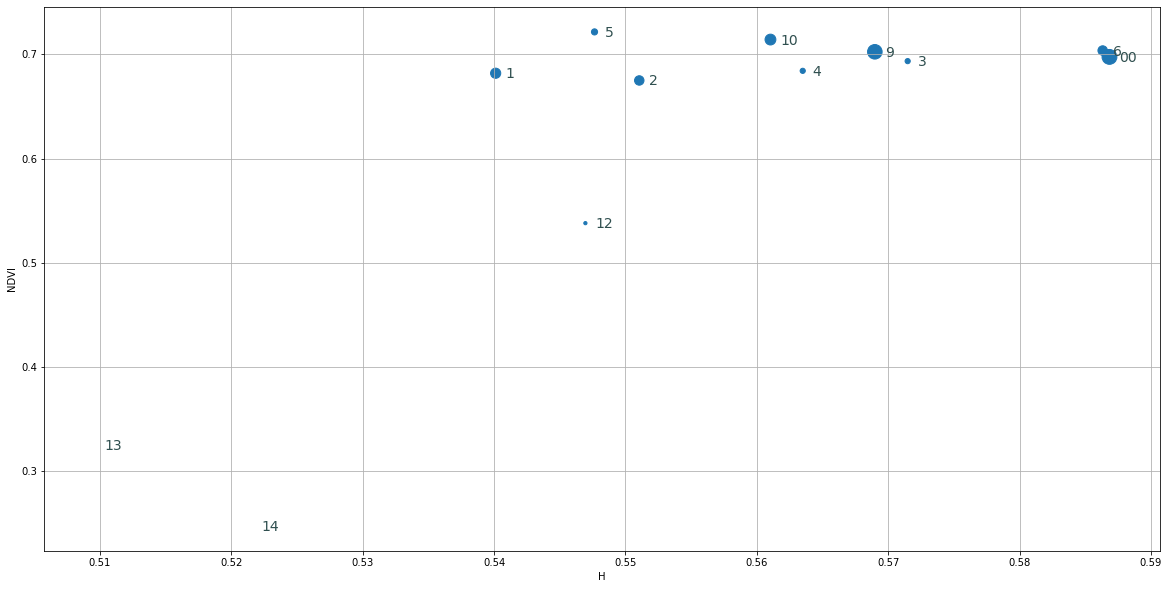

In [106]:
anotattedBubbleScatter(dataSAOCOM, 'H', 'NDVI', 'AGB')